In [ ]:
# pip install pingouin

In [1]:
# import necessary packages

import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp, norm, mannwhitneyu, wilcoxon
from scipy.interpolate import make_interp_spline, BSpline, interp1d

from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.proportion import proportions_ztest

import time
import statistics

from tqdm import tqdm

import networkx as nx
from random import randint

import math
# import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

import os

path = os.getcwd()
os.chdir(f"{path}")

In [65]:
# import necessary data

result = pd.read_csv("./result.csv")
paperdata = pd.read_csv("./paperdata.csv")
cb = pd.read_csv("./citationBara.csv")
primdata = pd.read_csv("./primdata.csv")
lastdata = pd.read_csv("./lastdata.csv")
# pair = pd.read_csv("./pairs.csv", chunksize = 1000000)
# mfpairs = pd.read_csv("./mfpairs.csv")
sim_mf = pd.read_csv("./mfpairs_similarity.csv")
# sim_mf_last = pd.read_csv("./mwpairs_similarity_edited.csv")
# sim_mm = pd.read_csv("./mmpairs_similarity.csv")

# sim_mf_5 = pd.read_csv('./sim_mf_5.csv')
# sim_mm_5 = pd.read_csv('./sim_mm_5.csv')

# Statistical Analyses

## Basic Statistics

In [5]:
print("Total papers: ", result.doi.nunique())
print("Papers with gender info: ", paperdata.doi.nunique())
print("Papers with primary gender info: ", primdata.doi.nunique())
print("Papers with last gender info: ", lastdata.doi.nunique())

Total papers:  541448
Papers with gender info:  375736
Papers with primary gender info:  273016
Papers with last gender info:  288395


In [6]:
print("Oldest paper: ", paperdata.year.min())
print("Newest paper: ", paperdata.year.max())
print("Number of journal categories: ", paperdata.journal.nunique())

Oldest paper:  1893
Newest paper:  2009
Number of journal categories:  11


In [7]:
print("Total authors: ", paperdata.id.nunique())
print("Total men authors: ", paperdata.query('gender == "male"').id.nunique())
print("Total women authors: ", paperdata.query('gender == "female"').id.nunique())

Total authors:  120776
Total men authors:  103014
Total women authors:  17762


In [8]:
# journal query condition

s = "PRA"

print(f"Total {s} papers: ", result[result['journal'] == s].doi.nunique())
print(f"{s} papers with gender info: ", paperdata[paperdata['journal'] == s].doi.nunique())

df = primdata[primdata['journal'] == s]
print("")
print(f"{s} papers with primary gender info: ", df.doi.nunique())
print(f"{s} papers written by primary man author: ", len(df[df['gender']=='male']))
print(f"{s} papers written by primary woman author: ", len(df[df['gender']=='female']))

df2 = lastdata[lastdata['journal'] == s]
print("")
print(f"{s} papers with last gender info: ", df2.doi.nunique())
print(f"{s} papers written by last man author: ", len(df2[df2['gender']=='male']))
print(f"{s} papers written by last woman author: ", len(df2[df2['gender']=='female']))

Total PRA papers:  65170
PRA papers with gender info:  45061

PRA papers with primary gender info:  33687
PRA papers written by primary man author:  29780
PRA papers written by primary woman author:  3907

PRA papers with last gender info:  35139
PRA papers written by last man author:  32034
PRA papers written by last woman author:  3105


In [9]:
# PACS query condition

pacs = 8

print(f"Total PACS {pacs}0 papers: ", result[result[f'pacs{pacs}0'] == 1].doi.nunique())
print(f"PACS {pacs}0 papers with gender info: ", paperdata[paperdata[f'pacs{pacs}0'] == 1].doi.nunique())

df = primdata[primdata[f'pacs{pacs}0'] == 1]
print("")
print(f"PACS {pacs}0 papers with primary gender info: ", df.doi.nunique())
print(f"PACS {pacs}0 papers written by primary man author: ", len(df[df['gender']=='male']))
print(f"PACS {pacs}0 papers written by primary woman author: ", len(df[df['gender']=='female']))

df2 = lastdata[lastdata[f'pacs{pacs}0'] == 1]
print("")
print(f"PACS {pacs}0 papers with last gender info: ", df2.doi.nunique())
print(f"PACS {pacs}0 papers written by last man author: ", len(df2[df2['gender']=='male']))
print(f"PACS {pacs}0 papers written by last woman author: ", len(df2[df2['gender']=='female']))

Total PACS 80 papers:  48558
PACS 80 papers with gender info:  32735

PACS 80 papers with primary gender info:  24676
PACS 80 papers written by primary man author:  21407
PACS 80 papers written by primary woman author:  3269

PACS 80 papers with last gender info:  25762
PACS 80 papers written by last man author:  23315
PACS 80 papers written by last woman author:  2447


### Alphabetically ordered papers and Author order analysis

In [10]:
# alphabetically ordered paper statistics

print("Total alphabetically ordered papers: ", len(result.query('is_alpha == True').drop_duplicates('doi')))

for i in range(10):
    print('')
    print(f"Total PACS {i}0 papers:", result.query(f'pacs{i}0 == 1').doi.nunique())
    print("Alphabetically ordered:",result.query(
        f'is_alpha == True & pacs{i}0 == 1').doi.nunique())
    print("Proportion of alpha papers:", format(result.query(
        f'is_alpha == True & pacs{i}0 == 1').doi.nunique()/result.query(
        f'pacs{i}0 == 1').doi.nunique() * 100, ".2f"),'%')

Total alphabetically ordered papers:  19159

Total PACS 00 papers: 104571
Alphabetically ordered: 4141
Proportion of alpha papers: 3.96 %

Total PACS 10 papers: 55650
Alphabetically ordered: 6088
Proportion of alpha papers: 10.94 %

Total PACS 20 papers: 35026
Alphabetically ordered: 1877
Proportion of alpha papers: 5.36 %

Total PACS 30 papers: 42794
Alphabetically ordered: 1088
Proportion of alpha papers: 2.54 %

Total PACS 40 papers: 57467
Alphabetically ordered: 1558
Proportion of alpha papers: 2.71 %

Total PACS 50 papers: 12330
Alphabetically ordered: 296
Proportion of alpha papers: 2.40 %

Total PACS 60 papers: 89689
Alphabetically ordered: 1912
Proportion of alpha papers: 2.13 %

Total PACS 70 papers: 155517
Alphabetically ordered: 2686
Proportion of alpha papers: 1.73 %

Total PACS 80 papers: 48558
Alphabetically ordered: 1007
Proportion of alpha papers: 2.07 %

Total PACS 90 papers: 26601
Alphabetically ordered: 1885
Proportion of alpha papers: 7.09 %


In [11]:
# Author order categorization

# filter out alphabetically ordered papers
nonalpha = paperdata.query('is_alpha == False')

first_author = nonalpha.query('order == 1').reset_index(drop=True)
second_author = nonalpha.query('order == 2 & numAuthor != 2').reset_index(drop=True)
middle_author = nonalpha.query('order >= 3 & order != numAuthor').reset_index(drop=True)
last_author = nonalpha.query('order == numAuthor & order != 1').reset_index(drop=True)

authors = [first_author, second_author, middle_author, last_author]
authors_name = ['first', 'second', 'middle', 'last']

In [13]:
# author order statistics

# print('Total submitted positions: ', len(paperdata))
# print('Total submitted female positions: ', len(paperdata.query('gender == "female"')))
# print('Total submitted female proportion: ', len(paperdata.query('gender == "female"'))/len(paperdata))

# print('Total submitted positions: ', len(nonalpha))
# print('Total submitted female positions: ', len(nonalpha.query('gender == "female"')))
# print('Total submitted female proportion: ', len(nonalpha.query('gender == "female"'))/len(nonalpha))

for i in range(4):
    ao_m, ao_w = 0, 0
    for j in range(len(authors[i])):
        if authors[i]['gender'][j] == 'male':
            ao_m += 1
        elif authors[i]['gender'][j] == 'female':
            ao_w += 1
    print('')
    print(f"Total {authors_name[i]} authors: ", len(authors[i]))
    print(f"Total {authors_name[i]} men authors: ", ao_m)
    print(f"{authors_name[i]} men authors' proportion: ", format(
        ao_m/len(nonalpha.query('gender == "male"')), ".4f"))
    print(f"Total {authors_name[i]} women authors: ", ao_w)
    print(f"{authors_name[i]} women authors' proportion: ", format(
        ao_w/len(nonalpha.query('gender == "female"')), ".4f"))
#     print(f"Total {authors_name[i]} women proportion: ", ao_w/len(authors[i]))
    zscore, pval = proportions_ztest([ao_m, ao_w],
        [len(nonalpha.query('gender == "male"')), len(nonalpha.query('gender == "female"'))])
    print('z-score:', format(zscore, ".2f"))
    print('p-value:', '{:g}'.format(float('{:.3g}'.format(pval))))

#     print(proportions_ztest([ao_w, len(nonalpha.query('gender == "female"'))],
#         [len(authors[i]), len(nonalpha)]))

#     print(proportions_ztest([ao_w, len(paperdata.query('gender == "female"'))],
#         [len(authors[i]), len(paperdata)]))


Total first authors:  273016
Total first men authors:  242290
first men authors' proportion:  0.3275
Total first women authors:  30726
first women authors' proportion:  0.3437
z-score: -9.74
p-value: 1.99e-22

Total second authors:  131612
Total second men authors:  116326
second men authors' proportion:  0.1572
Total second women authors:  15286
second women authors' proportion:  0.1710
z-score: -10.63
p-value: 2.09e-26

Total middle authors:  198075
Total middle men authors:  174786
middle men authors' proportion:  0.2363
Total middle women authors:  23289
middle women authors' proportion:  0.2605
z-score: -16.07
p-value: 4.15e-58

Total last authors:  226463
Total last men authors:  206374
last men authors' proportion:  0.2790
Total last women authors:  20089
last women authors' proportion:  0.2247
z-score: 34.37
p-value: 6.07e-259


### Participation Growth

In [14]:
# Observe number of authors by year, separated by gender

tdata = paperdata.copy()
tdata.sort_values("id", inplace = True)
tdata.drop_duplicates(subset = ["id", "year"],
                         keep = "first", inplace = True)

m_tdata = tdata[tdata['gender'] == 'male'].groupby(['year'])['year'].count()
w_tdata = tdata[tdata['gender'] == 'female'].groupby(['year'])['year'].count()

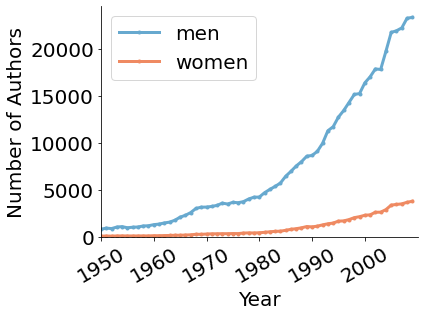

In [15]:
# Year vs. Number of Authors (Plot)

# Regular graph format throughout this paper
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Male authors
m_tdata.plot(style='.-',color='#67a9cf', lw=3)
# Female authors
w_tdata.plot(style='.-',color='#ef8a62', lw=3)

plt.legend(('men', 'women'), loc='upper left', fontsize=20)
plt.xticks(np.arange(1950, 2010, step=10), fontsize=20, rotation=30)
plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1950, xmax=2010)
plt.ylabel('Number of Authors', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)

plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/Fig_1A.pdf")

## Calculating Productivity and Dropout Rates

### Productivity Comparison

In [16]:
# Creating a DataFrame with productivity calculated
prod = paperdata.copy().groupby(['id', 'gender']).agg({'year': [min, max, 'count']})

prod['career_age'] = prod['year']['max'] - prod['year']['min']
prod['prod'] = prod['year']['count'] / (prod['career_age'])

In [17]:
# what is the ratio of men / women authors with career age of 0?

ca_zero = prod[prod['career_age'] == 0]
ca_zero.sort_values([('year','count')], ascending=False).head()

# Separating the DataFrame by gender
prod_all_m = prod.copy().xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
prod_all_w = prod.copy().xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

ca_zero_m = ca_zero.copy().xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
ca_zero_w = ca_zero.copy().xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

# Career Age by gender
ca_all_m = prod_all_m.groupby(['career_age'])['career_age'].count()
ca_all_w = prod_all_w.groupby(['career_age'])['career_age'].count()

ca_zero_m = ca_zero_m.groupby(['career_age'])['career_age'].count()
ca_zero_w = ca_zero_w.groupby(['career_age'])['career_age'].count()

print("Proportion of men authors with CA 0: ", format(sum(ca_zero_m)/sum(ca_all_m) * 100, ".2f"), "%")
print("Proportion of women authors with CA 0: ", format(sum(ca_zero_w)/sum(ca_all_w) * 100, ".2f"), "%")

Proportion of men authors with CA 0:  39.94 %
Proportion of women authors with CA 0:  47.56 %


In [18]:
# exclude 0 career age
prod = prod[prod['career_age'] != 0]

prod.sort_values([('year','count')], ascending=False).head()

# Separating the DataFrame by gender
prod_m = prod.xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
prod_w = prod.xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

# Career Age by gender
ca_m = prod_m.groupby(['career_age'])['career_age'].count()
ca_w = prod_w.groupby(['career_age'])['career_age'].count()

In [19]:
# only for data extraction

menca = ca_m.to_frame(name = 'men_count')
menca.reset_index(inplace=True)

womenca = ca_w.to_frame(name = 'women_count')
womenca.reset_index(inplace=True)

ca_df = menca.merge(womenca, on='career_age', how='outer').fillna(0).sort_values('career_age')
ca_df = ca_df.astype(int)
ca_df.head()

# ca_df.to_csv('./career_age_data.csv', index=False)

,career_age,men_count,women_count
0,1,6301,1224
1,2,5432,1038
2,3,4542,793
3,4,3890,698
4,5,3373,562


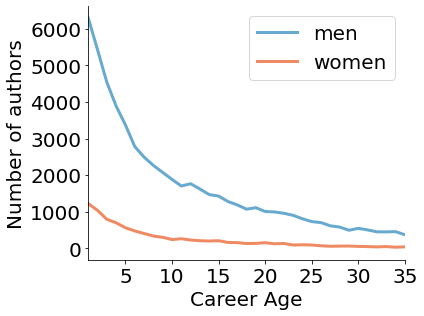

In [20]:
# Career age vs. Number of authors, separated by gender
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
ca_m.plot(color='#67a9cf', lw=3)
# Women authors
ca_w.plot(color='#ef8a62', lw=3)

plt.xticks(fontsize=20)
plt.xlim(1,35)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='upper right', fontsize=20)
plt.xlabel('Career Age', fontsize=20)
plt.ylabel('Number of authors', fontsize=20)
plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_4.pdf")

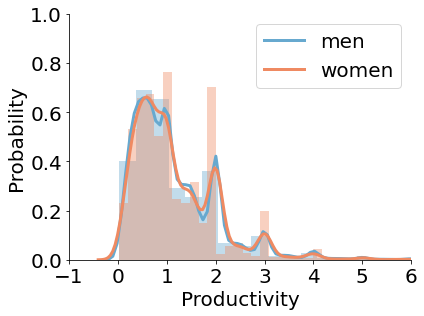

In [21]:
# Comparing PDFs

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

ax1 = sns.distplot(prod_m['prod'], ax=ax, label='male', color= '#67a9cf',kde_kws=dict(linewidth=3))
fit = ax1.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
ax1.legend()

ax2 = sns.distplot(prod_w['prod'], ax=ax, label='female', color= '#ef8a62',kde_kws=dict(linewidth=3))
fit = ax2.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
ax2.legend()

plt.legend(('men', 'women'), loc='upper right', fontsize=20)
plt.xlabel('Productivity', fontsize=20)
plt.xlim(xmin=-1, xmax=6)
plt.ylim(ymax=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Probability', fontsize=20)

plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/SI_Fig_5A.pdf")

In [22]:
# creating CDF data for productivity

cdf1=np.arange(len(prod_m))/float(len(prod_m)-1)
cdf2=np.arange(len(prod_w))/float(len(prod_w)-1)

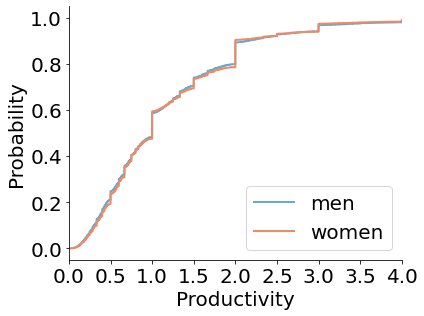

In [23]:
# Productivity CDF Plots
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(prod_m['prod'],1-cdf1, color='#67a9cf', lw=2)
# Women authors
plt.plot(prod_w['prod'],1-cdf2, color='#ef8a62', lw=2)

plt.xlabel('Productivity', fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(xmin=0, xmax=4)
plt.ylabel('Probability', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='lower right', fontsize=20)
plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/SI_Fig_5B.pdf")

In [25]:
# Run K-S test to compare the productivity

print('Two-way K-S:', ks_2samp(prod_m['prod'], prod_w['prod']))
print('Greater K-S:', ks_2samp(prod_m['prod'], prod_w['prod'], alternative='greater'))
print('Less K-S:', ks_2samp(prod_m['prod'], prod_w['prod'], alternative='less'))

Two-way K-S: KstestResult(statistic=0.018302046295788743, pvalue=0.008711930714457616)
Greater K-S: KstestResult(statistic=0.018302046295788743, pvalue=0.004350112321953321)
Less K-S: KstestResult(statistic=0.011221541461513107, pvalue=0.12906919986376664)


We see greater difference in productivity in favor of men authors.

In [26]:
# find out where the greatest difference in productivity occurs

def ks_2samp_x(data1, data2, alternative="two-sided"):
    data1 = np.sort(data1)
    data2 = np.sort(data2)
    n1 = data1.shape[0]
    n2 = data2.shape[0]

    data_all = np.concatenate([data1, data2])
    # using searchsorted solves equal data problem
    cdf1 = np.searchsorted(data1, data_all, side='right') / n1
    cdf2 = np.searchsorted(data2, data_all, side='right') / n2
    cddiffs = cdf1 - cdf2
    minS = np.argmin(cddiffs)   # ks_2samp uses np.min or np.max respectively 
    maxS = np.argmax(cddiffs)   # now we get instead the index in data_all
    alt2Dvalue = {'less': minS, 'greater': maxS, 'two-sided': max(minS, maxS)}
    d_arg = alt2Dvalue[alternative]
    return data_all[d_arg]

print("The greatest difference in productivity occurs at:", 
      ks_2samp_x(prod_m['prod'], prod_w['prod'], alternative='greater'))

The greatest difference in productivity occurs at: 0.4909090909090909


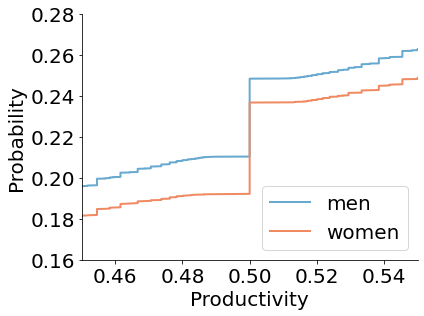

In [27]:
# Productivity CDF Plots
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(prod_m['prod'],1-cdf1, color='#67a9cf', lw=2)
# Women authors
plt.plot(prod_w['prod'],1-cdf2, color='#ef8a62', lw=2)

plt.xlabel('Productivity', fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(xmin=0, xmax=4)
plt.ylabel('Probability', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='lower right', fontsize=20)
plt.tight_layout()

# Use the following xlim, ylim instead for zoomed-in plot
plt.xlim(xmin=0.45, xmax=0.55)
plt.ylim(ymin=0.16, ymax=0.28)
plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/SI_Fig_5C.pdf")

### Dropout Rate Comparison

In [28]:
# exclude authors who enter APS publication after 2004
# create scatterplot of dropout authors by career age

dropout = prod[prod['year']['min'] < 2004].groupby(
    ['gender', 'career_age'])['career_age'].count()

dropout_m = dropout['male'].sort_index(ascending=False)
dropout_w = dropout['female'].sort_index(ascending=False)

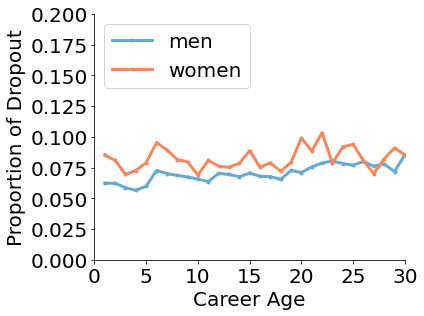

In [29]:
# Career Age vs. Proportion of Dropout (plot)

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
(dropout_m/dropout_m.cumsum()).iloc[::-1].plot(
    style='.-', color='#67a9cf', lw=3)
# Women authors
(dropout_w/dropout_w.cumsum()).iloc[::-1].plot(
    style='.-',color='#ef8a62', lw=3)

plt.legend(('men', 'women'), loc='upper left', fontsize=20)
plt.xlabel('Career Age', fontsize=20)
plt.xlim(0,30)
plt.ylabel('Proportion of Dropout', fontsize=20)
plt.ylim(0, 0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/Fig_1C.pdf")

In [30]:
# dropout rate comparison

do_comparison = (dropout_w/dropout_w.cumsum() - dropout_m/dropout_m.cumsum())
do_comparison[:19].sort_values(ascending=False)[:5]

career_age
1    0.022800
6    0.022590
7    0.019358
5    0.019054
2    0.018596
Name: career_age, dtype: float64

### Career Age Analysis

In [31]:
# Set up DataFrames for Career Age vs. Average number of publications
# separated by gender

subdata = paperdata.copy().drop(['order','doi','numAuthor',
                                 'is_alpha','articleType','journal'],
                    axis=1).sort_values(by=['id', 'year'])
subdata["ca"] = subdata.groupby("id")["year"].transform(lambda x: x - x.min())

subdata_m = subdata[subdata['gender'] == 'male'].drop(
    ['gender', 'year'], axis=1).groupby(['id', 'ca']).size().to_frame(
    name='count').reset_index(level='id', drop=True).reset_index()

subdata_w = subdata[subdata['gender'] == 'female'].drop(
    ['gender', 'year'], axis=1).groupby(['id', 'ca']).size().to_frame(
    name='count').reset_index(level='id', drop=True).reset_index()

subdata_m = subdata_m.groupby("ca").agg(
    ['count', np.mean, np.std]).reset_index()
subdata_w = subdata_w.groupby("ca").agg(
    ['count', np.mean, np.std]).reset_index()

In [32]:
# Calculate standard error for the shaded area in plots

semlist1, semlist2 = [], []

for i in range(len(subdata_m)):
    semlist1.append(subdata_m["count"]['std'][i]/math.sqrt(subdata_m["count"]['count'][i]))
subdata_m['sem'] = semlist1

for i in range(len(subdata_w)):
    semlist2.append(subdata_w["count"]['std'][i]/math.sqrt(subdata_w["count"]['count'][i]))
subdata_w['sem'] = semlist2

# Append to the existing DataFrames
subdata_m = subdata_m.set_index('ca').reindex(range(
    subdata_m.ca.min(),subdata_m.ca.max()+1)).fillna(np.nan).reset_index()
subdata_w = subdata_w.set_index('ca').reindex(range(
    subdata_w.ca.min(),subdata_w.ca.max()+1)).fillna(np.nan).reset_index()

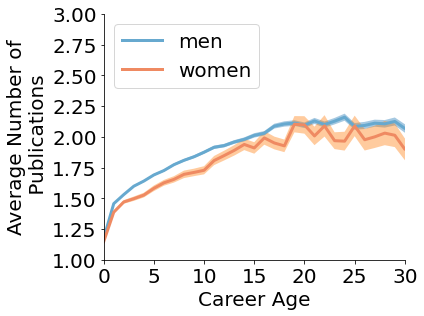

In [33]:
# Career age vs. Average number of publications (plot)

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(subdata_m.ca,subdata_m["count"]["mean"],"-",label="men",
         color='#67a9cf', lw=3)

# shading the SE area (man)
X  = np.linspace(min(subdata_m.ca),max(subdata_m.ca),subdata_m.ca.nunique())
plt.fill_between(X,
                 subdata_m["count"]["mean"] + subdata_m["sem"],
                 subdata_m["count"]["mean"] - subdata_m["sem"],
                 color='C0',alpha=.4,edgecolor="none")

# Women authors
plt.plot(subdata_w.ca,subdata_w["count"]["mean"],"-",label="women",
         color='#ef8a62', lw=3)

# shading the SE area (woman)
X  = np.linspace(min(subdata_w.ca),max(subdata_w.ca),subdata_w.ca.nunique())
plt.fill_between(X,
                 subdata_w["count"]["mean"] + subdata_w["sem"],
                 subdata_w["count"]["mean"] - subdata_w["sem"],
                 color='C1',alpha=.4,edgecolor="none")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Career Age",fontsize=20)
plt.ylabel("Average Number of\n Publications",fontsize=20)
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=1, ymax=3)
plt.legend(loc='upper left', fontsize=20)

plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/Fig_1B.pdf")

# Network / Similarity Analyses

## Pair matching (Pre-requisite)

In [34]:
# DataFrame: {citing_doi, citing_year, cited_doi}

citinfo = primdata[["doi", "year"]].drop_duplicates(subset = 'doi')
# citinfo = lastdata[["doi", "year"]].drop_duplicates(subset = 'doi')
cols = ['citing_doi', 'citing_year', 'cited_doi']

citinfo = citinfo.merge(cb, left_on = 'doi', right_on = 'citing_doi',
              how = 'inner').drop(['doi'], axis=1).rename(
                  {'year': 'citing_year'}, axis=1).reindex(
                      columns=cols).sort_values('cited_doi')

citinfo.head()

,citing_doi,citing_year,cited_doi
120191,10.1103/PhysRev.21.250,1923,10.1103/PhysRev.1.124
123113,10.1103/PhysRev.40.281,1932,10.1103/PhysRev.1.124
120140,10.1103/PhysRev.2.109,1913,10.1103/PhysRev.1.124
144119,10.1103/PhysRev.8.738,1916,10.1103/PhysRev.1.124
2739988,10.1103/PhysRevSeriesI.2.1,1894,10.1103/PhysRev.1.2


## Self-citation Analysis

In [35]:
# creating all citation dataset with gender information

self1 = citinfo.copy()
# self2 = primdata[['doi','id','gender']]
self2 = paperdata[['doi','id','gender']]

# selfinfo = self1.merge(self2, left_on='citing_doi', right_on='doi').drop(
#     ['citing_doi', 'doi'], axis=1).drop_duplicates().reset_index(drop=True)
# selfinfo.columns = ['citing_year', 'cited_doi', 'citing_id', 'citing_gender']

selfinfo = self1.merge(self2, left_on='citing_doi', right_on='doi').drop(
    ['doi'], axis=1).drop_duplicates().reset_index(drop=True)
selfinfo.columns = ['citing_doi', 'citing_year', 'cited_doi', 'citing_id', 'citing_gender']

# selfinfo = selfinfo.merge(self2, left_on='cited_doi', right_on='doi').drop(
#     ['cited_doi', 'doi', 'gender'], axis=1).drop_duplicates().reset_index(drop=True)
# selfinfo.columns = ['citing_year', 'citing_id', 'citing_gender', 'cited_id']

selfinfo = selfinfo.merge(self2, left_on='cited_doi', right_on='doi').drop(
    ['doi', 'gender'], axis=1).drop_duplicates().reset_index(drop=True)
selfinfo.columns = ['citing_doi', 'citing_year', 'cited_doi', 'citing_id', 'citing_gender', 'cited_id']

print(len(selfinfo))
selfinfo.head()

16136416


,citing_doi,citing_year,cited_doi,citing_id,citing_gender,cited_id
0,10.1103/PhysRev.21.250,1923,10.1103/PhysRev.1.124,212878,male,106864
1,10.1103/PhysRev.40.281,1932,10.1103/PhysRev.1.124,211997,male,106864
2,10.1103/PhysRev.2.109,1913,10.1103/PhysRev.1.124,109426,male,106864
3,10.1103/PhysRev.8.738,1916,10.1103/PhysRev.1.124,165511,female,106864
4,10.1103/PhysRev.21.250,1923,10.1103/PhysRev.17.354,212878,male,94158


In [36]:
# create a DataFrame with self-citing authors by gender

# all sample (population)
pop = selfinfo.copy().groupby(['citing_year'])['citing_year'].count()

# men authors
mpop = selfinfo.copy().loc[selfinfo['citing_gender'] == 'male'].groupby(
    ['citing_year'])['citing_year'].count()
# women authors
wpop = selfinfo.copy().loc[selfinfo['citing_gender'] == 'female'].groupby(
    ['citing_year'])['citing_year'].count()

# self citing authors
selfcit = selfinfo.copy().loc[selfinfo['citing_id'] == selfinfo['cited_id']].groupby(
    ['citing_year'])['citing_year'].count()

# men self citing authors
m_sc = selfinfo.copy().loc[(selfinfo['citing_id'] == selfinfo['cited_id']) &
                   (selfinfo['citing_gender'] == 'male')].groupby(
                       ['citing_year'])['citing_year'].count()
# women self citing authors
w_sc = selfinfo.copy().loc[(selfinfo['citing_id'] == selfinfo['cited_id']) & 
                     (selfinfo['citing_gender'] == 'female')].groupby(
                         ['citing_year'])['citing_year'].count()

# missing values to 0
pop[np.isnan(pop)] = 0
mpop[np.isnan(mpop)] = 0
wpop[np.isnan(wpop)] = 0
selfcit[np.isnan(selfcit)] = 0
m_sc[np.isnan(m_sc)] = 0
w_sc[np.isnan(w_sc)] = 0

In [37]:
# self-citation statistics per citation

print("Total # of citations: ", sum(pop))
print("Total # of citations by men: ", sum(mpop))
print("Proportion of men citation: ", format(sum(mpop)/sum(pop), ".4f"))
print("Total # of citations by women: ", sum(wpop))
print("Proportion of women citation: ", format(sum(wpop)/sum(pop), ".4f"))
print("")
print("Total # of self-citations: ", sum(selfcit))
print("Total # of self-citations by men: ", sum(m_sc))
print("Proportion of men self-citation: ", format(sum(m_sc)/sum(selfcit), ".4f"))
print("Total # of self-citations by women: ", sum(w_sc))
print("Proportion of women self-citation: ", format(sum(w_sc)/sum(selfcit), ".4f"))
print("")
print("Self-citation ratio: ", format(sum(selfcit)/sum(pop) * 100, ".2f"), "%")
print("Men's self-citation ratio: ", format(sum(m_sc)/sum(mpop) * 100, ".2f"), "%")
print("Women's self-citation ratio: ", format(sum(w_sc)/sum(wpop) * 100, ".2f"), "%")

Total # of citations:  16136416
Total # of citations by men:  14283295
Proportion of men citation:  0.8852
Total # of citations by women:  1853121
Proportion of women citation:  0.1148

Total # of self-citations:  655514
Total # of self-citations by men:  596628
Proportion of men self-citation:  0.9102
Total # of self-citations by women:  58886
Proportion of women self-citation:  0.0898

Self-citation ratio:  4.06 %
Men's self-citation ratio:  4.18 %
Women's self-citation ratio:  3.18 %


In [38]:
# self-citation statistics per author

observed = selfinfo.citing_id.nunique()
observed_m = selfinfo.query('citing_gender == "male"').citing_id.nunique()
observed_w = selfinfo.query('citing_gender == "female"').citing_id.nunique()

selfcit_author = selfinfo.query('citing_id == cited_id').citing_id.nunique()
selfcit_author_m = selfinfo.query(
    'citing_id == cited_id & citing_gender == "male"').citing_id.nunique()
selfcit_author_w = selfinfo.query(
    'citing_id == cited_id & citing_gender == "female"').citing_id.nunique()

print("Total # of observed authors: ", observed)
print("Total # of observed men authors: ", observed_m)
print("Proportion of observed men authors: ", format(observed_m/observed, ".4f"))
print("Total # of observed women authors: ", observed_w)
print("Proportion of observed women authors: ", format(observed_w/observed, ".4f"))
print("")
print("Total # of observed self-citing authors: ", selfcit_author)
print("Total # of observed self-citing men authors: ", selfcit_author_m)
print("Proportion of observed self-citing men authors: ", format(selfcit_author_m/selfcit_author, ".4f"))
print("Total # of observed self-citing women authors: ", selfcit_author_w)
print("Proportion of observed self-citing women authors: ", format(selfcit_author_w/selfcit_author, ".4f"))
print("")
print("Self-citation ratio (per author): ", format(selfcit_author/observed * 100, ".2f"), "%")
print("Men's self-citation ratio (per author): ", format(selfcit_author_m/observed_m * 100, ".2f"), "%")
print("Women's self-citation ratio (per author): ", format(selfcit_author_w/observed_w * 100, ".2f"), "%")

Total # of observed authors:  105926
Total # of observed men authors:  90559
Proportion of observed men authors:  0.8549
Total # of observed women authors:  15367
Proportion of observed women authors:  0.1451

Total # of observed self-citing authors:  52978
Total # of observed self-citing men authors:  46354
Proportion of observed self-citing men authors:  0.8750
Total # of observed self-citing women authors:  6624
Proportion of observed self-citing women authors:  0.1250

Self-citation ratio (per author):  50.01 %
Men's self-citation ratio (per author):  51.19 %
Women's self-citation ratio (per author):  43.11 %


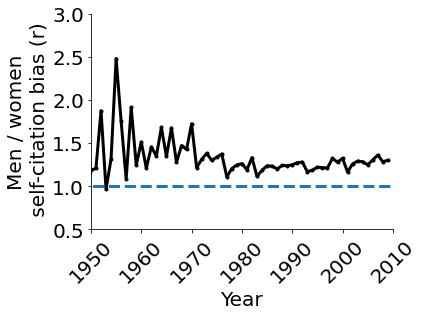

In [39]:
# calculate r-value
r1 = ((m_sc/selfcit)/(w_sc/selfcit))
r2 = ((wpop/pop)/(mpop/pop))
r = r1*r2

# create r-value plot
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

r.plot(style='.-', color='black', lw=3)

plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1950)
# plt.xlim(xmin=1960)
plt.xlim(xmax=2010)
plt.ylabel('Men / women\n self-citation bias (r)', fontsize=20)
# plt.ylim(ymin=0.5,ymax=3.5)
plt.ylim(ymin=0.5,ymax=3)
plt.hlines(1,xmin=1903,xmax=2010,linestyles='dashed', lw=3)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/Fig_1D.pdf")

## Degree & PageRank Centrality Statistics

### Degree Centrality Proportion of Women Authors

In [40]:
# exclude alphabetically ordered papers
# only consider first authors
degcen = paperdata.query('is_alpha == False & order == 1')

# calculate degree centrality per paper
vc = cb['cited_doi'].value_counts()
cb_sub = vc[vc.to_numpy() > 0].to_frame()

# create a DataFrame with degree centrality
cited = pd.merge(cb_sub, degcen, left_index = True, right_on = 'doi').rename(columns = {'cited_doi': 'centrality'})
cited['yeard'] = 2010-cited['year']
cited.head()

,centrality,doi,id,gender,order,numAuthor,is_alpha,year,articleType,journal,...,pacs10,pacs20,pacs30,pacs40,pacs50,pacs60,pacs70,pacs80,pacs90,yeard
16644,5214,10.1103/PhysRev.140.A1133,219005,male,1,2,False,1965,article,PR,...,0,0,0,0,0,0,0,0,0,45
14878,4100,10.1103/PhysRev.136.B864,12626,male,1,2,False,1964,article,PR,...,0,0,0,0,0,0,0,0,0,46
151045,2519,10.1103/PhysRevB.13.5188,133666,male,1,2,False,1976,article,PRB,...,0,0,0,0,0,0,0,0,0,34
258027,2337,10.1103/PhysRevB.54.11169,157378,male,1,2,False,1996,article,PRB,...,0,0,0,0,0,0,1,0,0,14
3428,1679,10.1103/PhysRev.108.1175,165388,male,1,3,False,1957,article,PR,...,0,0,0,0,0,0,0,0,0,53


In [41]:
# Top k% degree centrality basic statistics

print(f"Top 10% Centrality ({cb_sub.cited_doi[len(cb_sub)//10]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10]]))
print(f"Men in Top 10% ({cb_sub.cited_doi[len(cb_sub)//10]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10]) & (cited['gender'] == "male")]))
print(f"Women in Top 10% ({cb_sub.cited_doi[len(cb_sub)//10]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10]) & (cited['gender'] == "female")]))
print("")
print(f"Top 20% Centrality ({cb_sub.cited_doi[len(cb_sub)//10 * 2]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 2]]))
print(f"Men in Top 20% ({cb_sub.cited_doi[len(cb_sub)//10 * 2]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 2]) & (cited['gender'] == "male")]))
print(f"Women in Top 20% ({cb_sub.cited_doi[len(cb_sub)//10 * 2]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 2]) & (cited['gender'] == "female")]))
print("")
print(f"Top 30% Centrality ({cb_sub.cited_doi[len(cb_sub)//10 * 3]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 3]]))
print(f"Men in Top 30% ({cb_sub.cited_doi[len(cb_sub)//10 * 3]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 3]) & (cited['gender'] == "male")]))
print(f"Women in Top 30% ({cb_sub.cited_doi[len(cb_sub)//10 * 3]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 3]) & (cited['gender'] == "female")]))
print("")
print(f"Top 40% Centrality ({cb_sub.cited_doi[len(cb_sub)//10 * 4]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 4]]))
print(f"Men in Top 40% ({cb_sub.cited_doi[len(cb_sub)//10 * 4]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 4]) & (cited['gender'] == "male")]))
print(f"Women in Top 40% ({cb_sub.cited_doi[len(cb_sub)//10 * 4]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 4]) & (cited['gender'] == "female")]))

Top 10% Centrality (25+):  24272
Men in Top 10% (25+):  22191
Women in Top 10% (25+):  2081

Top 20% Centrality (15+):  47843
Men in Top 20% (15+):  43534
Women in Top 20% (15+):  4309

Top 30% Centrality (10+):  73964
Men in Top 30% (10+):  67025
Women in Top 30% (10+):  6939

Top 40% Centrality (7+):  101289
Men in Top 40% (7+):  91376
Women in Top 40% (7+):  9913


In [42]:
def cummean(x):
    return x.cumsum() / (np.arange(1, len(x) + 1))

def plot_topk_mean_m(x):
    n = len(x)
    plt.plot(100 * (1 + np.arange(n)) / n, cummean(x[::-1]), color='#67a9cf',
             lw=3, label='men')

def plot_topk_mean_w(x):
    n = len(x)
    plt.plot(100 * (1 + np.arange(n)) / n, cummean(x[::-1]), color='#ef8a62',
             lw=3, label='women')

# def plot_topk_mean_w(x):
#     n = len(x)
#     plt.plot(100 * (1 + np.arange(n)) / n, cummean(x[::-1]), color='black',
#              lw=3)

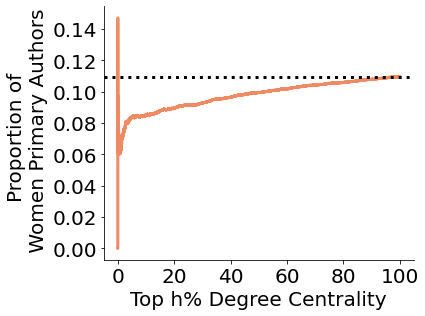

In [43]:
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plot_topk_mean_w(cited.sort_values(by='centrality')['gender'] == 'female')

plt.axhline(y=len(cited[cited['gender'] == 'female'])/len(cited),
            color='black', linestyle='dotted', lw=3)

plt.xlabel("Top h% Degree Centrality", fontsize=20)
plt.ylabel("Proportion of \n Women Primary Authors", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(ymax=0.1)
plt.tight_layout()

# plt.legend(loc='upper right', fontsize=20)
# fig.savefig(f"/Users/robinkong/codes/Fig_3A_degree.pdf")

### PageRank Centrality Proportion of Women Authors

In [44]:
cen1 = cb.copy()
cen2 = primdata[['doi','gender']]
# cen2 = lastdata[['doi','gender']]

cen = cen1.merge(cen2, left_on='citing_doi', right_on='doi').drop('doi', axis=1).reset_index(drop=True)
cen = cen.merge(cen2, left_on='cited_doi', right_on='doi').drop('doi', axis=1).reset_index(drop=True)
cen.columns = ['citing_doi', 'cited_doi', 'citing_gender', 'cited_gender']
cen.head()

,citing_doi,cited_doi,citing_gender,cited_gender
0,10.1103/PhysRevSeriesI.11.215,10.1103/PhysRevSeriesI.1.1,male,male
1,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.1.1,male,male
2,10.1103/RevModPhys.51.863,10.1103/PhysRevSeriesI.1.1,male,male
3,10.1103/PhysRevSeriesI.4.433,10.1103/PhysRevSeriesI.1.1,male,male
4,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.11.215,male,male


In [45]:
# apply nx.graph to citation relationship network
Graphtype = nx.DiGraph()

C = nx.from_pandas_edgelist(cen, source='citing_doi',
                            target='cited_doi', create_using=Graphtype)
# print(nx.info(C))

In [46]:
# observe author id & gender
nodedata = primdata[['doi','id','gender']]
# nodedata = lastdata[['doi','id','gender']]

In [47]:
# assign PageRank centrality to each paper
pr = nx.pagerank(C)

# create a centrality dataframe
prs = pd.DataFrame()
prs['doi'] = pr.keys()
prs['PRcen'] = pr.values()

# merge and create a dataframe: id, gender, PageRank centrality
prs_new = prs.merge(nodedata, on='doi', how='left').sort_values('PRcen', ascending=False)
prs_new.head()

,doi,PRcen,id,gender
5469,10.1103/PhysRev.140.A1133,0.001709,219005,male
42329,10.1103/PhysRev.136.B864,0.001404,12626,male
33589,10.1103/PhysRev.108.1175,0.001370,165388,male
48,10.1103/PhysRev.47.777,0.001022,38494,male
117022,10.1103/PhysRev.65.117,0.000763,59830,male


In [48]:
pr_age = prs_new.merge(cited, on='doi', how='inner')
pr_age = pr_age[['PRcen', 'doi', 'id_x', 'gender_x', 'yeard']]
pr_age = pr_age.rename(columns={'id_x': "id", "gender_x": "gender"}
                      ).sort_values('PRcen',ascending=False)

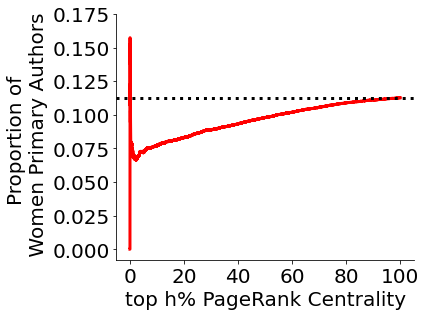

In [49]:
# Comparative graph for actual female proportion vs. expected female proportion

prs_gender = prs_new['gender'].to_numpy()
cumulate_prs_gender = np.cumsum(prs_gender == "female")

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plt.plot((np.arange(len(prs_new))*100)/len(prs_new),
         cumulate_prs_gender/np.arange(1, len(prs_new)+1), color='red', lw=3)
# plt.axhline(y=0.08274119036274367, color='black', linestyle='dotted', lw=3)
plt.axhline(y=len(prs_new[prs_new['gender'] == 'female'])/len(prs_new),
            color='black', linestyle='dotted', lw=3)


plt.xlabel("top h% PageRank Centrality", fontsize=20)
plt.ylabel("Proportion of \n Women Primary Authors", fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymax=0.175)
plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/Fig_3A_PageRank.pdf")

### Degree & PageRank Centrality vs. Average Career Age (OR Average Paper Age)

In [50]:
centca = cited.merge(prod, on='id', how='inner')
centca = centca[['centrality', 'doi', 'id', 'gender', 'order', 
                 ('career_age', '')]]
centca.rename(columns={('career_age', ''): "CA"}, inplace=True)
centca = centca.sort_values('centrality', ascending=False)

centca.head()

,centrality,doi,id,gender,order,CA
0,5214,10.1103/PhysRev.140.A1133,219005,male,1,62
50,2519,10.1103/PhysRevB.13.5188,133666,male,1,30
58,2337,10.1103/PhysRevB.54.11169,157378,male,1,16
71,1679,10.1103/PhysRev.108.1175,165388,male,1,60
121,1675,10.1103/PhysRev.124.1866,114066,male,1,50


In [35]:
# # data extraction

# centca = centca.reset_index(drop=True)
# centca.to_csv('./centrality_career_age.csv', index=False)

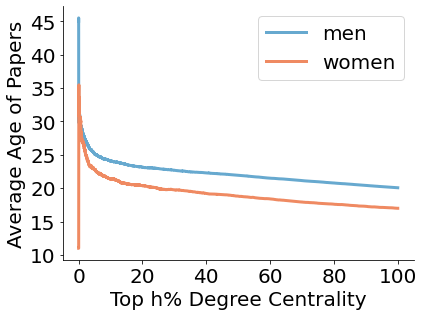

In [51]:
# Degree Centrality vs. Avg Paper Age

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plot_topk_mean_m(cited[cited['gender'] == 'male'].sort_values(
    by='centrality')['yeard'])

plot_topk_mean_w(cited[cited['gender'] == 'female'].sort_values(
    by='centrality')['yeard'])

plt.xlabel("Top h% Degree Centrality", fontsize=20)
plt.ylabel("Average Age of Papers", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.legend(loc='upper right', fontsize=20)
# fig.savefig("./top_avg_paper_age.pdf")

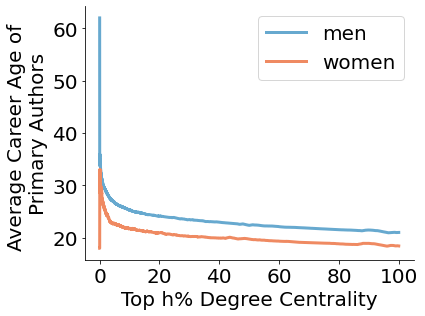

In [52]:
# Degree Centrality vs. Avg Author Career Age

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plot_topk_mean_m(centca[centca['gender'] == 'male'].sort_values(
    by='centrality')['CA'])

plot_topk_mean_w(centca[centca['gender'] == 'female'].sort_values(
    by='centrality')['CA'])

plt.xlabel("Top h% Degree Centrality", fontsize=20)
plt.ylabel("Average Career Age of \nPrimary Authors", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.legend(loc='upper right', fontsize=20)
# fig.savefig("./top_ave_age_degree.pdf")

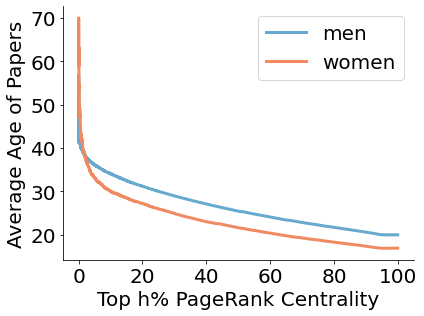

In [53]:
# PageRank Centrality vs. Avg Paper Age

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plot_topk_mean_m(pr_age[pr_age['gender'] == 'male'].sort_values(
    by='PRcen')['yeard'])

plot_topk_mean_w(pr_age[pr_age['gender'] == 'female'].sort_values(
    by='PRcen')['yeard'])

plt.xlabel("Top h% PageRank Centrality", fontsize=20)
plt.ylabel("Average Age of Papers", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.legend(loc='upper right', fontsize=20)
# fig.savefig("./top_ave_paper_age_PR.pdf")

In [54]:
prca = prs_new.merge(prod, on='id', how='inner')
prca = prca[['PRcen', 'doi', 'id', 'gender', ('career_age', '')]]
prca.rename(columns={('career_age', ''): "CA"}, inplace=True)
prca = prca.sort_values('PRcen', ascending=False)
prca.head()

,PRcen,doi,id,gender,CA
0,0.001709,10.1103/PhysRev.140.A1133,219005,male,62
50,0.001370,10.1103/PhysRev.108.1175,165388,male,60
100,0.001022,10.1103/PhysRev.47.777,38494,male,22
108,0.000763,10.1103/PhysRev.65.117,59830,male,30
115,0.000740,10.1103/PhysRevLett.19.1264,115009,male,53


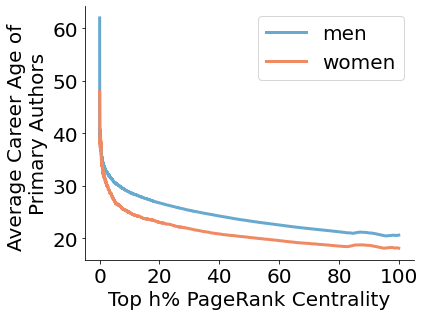

In [55]:
# PageRank Centrality vs. Avg Author Career Age

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plot_topk_mean_m(prca[prca['gender'] == 'male'].sort_values(
    by='PRcen')['CA'])

plot_topk_mean_w(prca[prca['gender'] == 'female'].sort_values(
    by='PRcen')['CA'])

plt.xlabel("Top h% PageRank Centrality", fontsize=20)
plt.ylabel("Average Career Age of \nPrimary Authors", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.legend(loc='upper right', fontsize=20)
# fig.savefig("./top_ave_age_pr.pdf")

#### w/ in-set

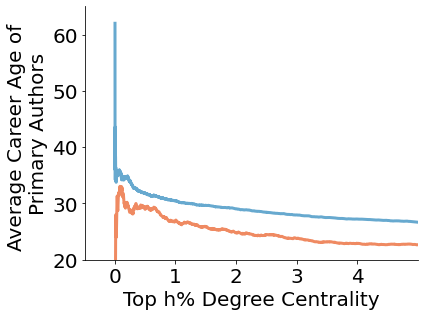

In [56]:
# Degree Centrality vs. Avg Author Career Age (w/ inset)

# fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

ccm = centca[centca['gender'] == 'male'].sort_values(by='centrality')
ccfm = centca[centca['gender'] == 'female'].sort_values(by='centrality')

plot_topk_mean_m(ccm.CA)
plot_topk_mean_w(ccfm.CA)

# inset_ax = ax.inset_axes([0.15, 0.5, 0.6, 0.45])
# inset_ax.plot(ccm['centrality'][:100], ccm['CA'][:100], color='black', lw=2)
# inset_ax.plot(ccfm['centrality'][:50], ccfm['CA'][:50], color='black', lw=2)
# inset_ax.tick_params(labelsize=15)

plt.xlabel("Top h% Degree Centrality", fontsize=20)
plt.ylabel("Average Career Age of \nPrimary Authors", fontsize=20)

plt.xlim(xmax=5,xmin=-0.5)
plt.ylim(ymax=65, ymin=20)
# plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 5, 1), fontsize=20)
plt.yticks(np.arange(20, 65, 10), fontsize=20)
# ax.indicate_inset_zoom(inset_ax, edgecolor="black", linewidth = 4)
plt.tight_layout()

# plt.legend(loc='upper right', fontsize=20)

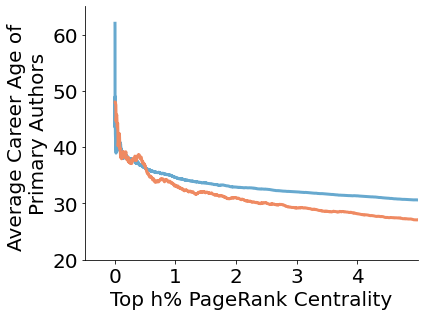

In [57]:
# PageRank Centrality vs. Avg Author Career Age (w/ inset)

# fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

prcm = prca[prca['gender'] == 'male'].sort_values(by='PRcen')
prcfm = prca[prca['gender'] == 'female'].sort_values(by='PRcen')

plot_topk_mean_m(prcm.CA)
plot_topk_mean_w(prcfm.CA)

# inset_ax = ax.inset_axes([0.15, 0.5, 0.6, 0.45])
# inset_ax.plot(ccm['centrality'][:100], ccm['CA'][:100], color='black', lw=2)
# inset_ax.plot(ccfm['centrality'][:50], ccfm['CA'][:50], color='black', lw=2)
# inset_ax.tick_params(labelsize=15)

plt.xlabel("Top h% PageRank Centrality", fontsize=20)
plt.ylabel("Average Career Age of \nPrimary Authors", fontsize=20)

plt.xlim(xmax=5,xmin=-0.5)
plt.ylim(ymax=65, ymin=20)
# plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 5, 1), fontsize=20)
plt.yticks(np.arange(20, 65, 10), fontsize=20)
# ax.indicate_inset_zoom(inset_ax, edgecolor="black", linewidth = 4)
plt.tight_layout()

# plt.legend(loc='upper right', fontsize=20)

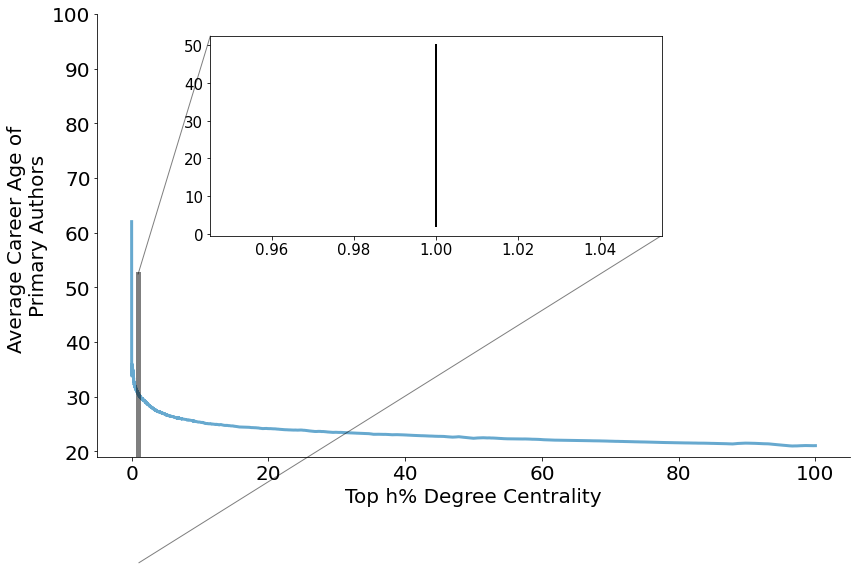

In [58]:
# Degree Centrality vs. Avg Author Career Age (w/ inset)

fig, ax = plt.subplots(figsize=(12,8))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

ccm = centca[centca['gender'] == 'male'].sort_values(by='centrality')
ccfm = centca[centca['gender'] == 'female'].sort_values(by='centrality')

plot_topk_mean_m(ccm.CA)
# plot_topk_mean_w(ccfm.CA)

inset_ax = ax.inset_axes([0.15, 0.5, 0.6, 0.45])
inset_ax.plot(ccm['centrality'][:100], ccm['CA'][:100], color='black', lw=2)
# inset_ax.plot(ccfm['centrality'][:50], ccfm['CA'][:50], color='black', lw=2)
inset_ax.tick_params(labelsize=15)

plt.xlabel("Top h% Degree Centrality", fontsize=20)
plt.ylabel("Average Career Age of \nPrimary Authors", fontsize=20)

plt.ylim(ymax=100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.indicate_inset_zoom(inset_ax, edgecolor="black", linewidth = 4)
plt.tight_layout()

# plt.legend(loc='upper right', fontsize=20)

## Standardization

In [60]:
# exclude alphabetically ordered papers
# only consider first authors
degcen = paperdata.query('is_alpha == False & order == 1')

# calculate degree centrality per paper
vc = cb['cited_doi'].value_counts()
cb_sub = vc[vc.to_numpy() > 0].to_frame()

# create a DataFrame with degree centrality
cited = pd.merge(cb_sub, degcen, left_index = True, right_on = 'doi').rename(columns = {'cited_doi': 'centrality'})
cited.head()

,centrality,doi,id,gender,order,numAuthor,is_alpha,year,articleType,journal,pacs00,pacs10,pacs20,pacs30,pacs40,pacs50,pacs60,pacs70,pacs80,pacs90
16644,5214,10.1103/PhysRev.140.A1133,219005,male,1,2,False,1965,article,PR,0,0,0,0,0,0,0,0,0,0
14878,4100,10.1103/PhysRev.136.B864,12626,male,1,2,False,1964,article,PR,0,0,0,0,0,0,0,0,0,0
151045,2519,10.1103/PhysRevB.13.5188,133666,male,1,2,False,1976,article,PRB,0,0,0,0,0,0,0,0,0,0
258027,2337,10.1103/PhysRevB.54.11169,157378,male,1,2,False,1996,article,PRB,0,0,0,0,0,0,0,1,0,0
3428,1679,10.1103/PhysRev.108.1175,165388,male,1,3,False,1957,article,PR,0,0,0,0,0,0,0,0,0,0


In [61]:
yrstat = cited.copy()[['centrality', 'year']].groupby('year').agg({'centrality': ['mean', 'std']})
yrstat.head()

centrality          
           mean       std
year                     
1893       2.50  2.121320
1895       2.00  0.000000
1896       1.50  0.707107
1897       2.25  1.908627
1898       2.00  1.936492

In [62]:
cited = cited.merge(yrstat, on='year').rename(columns = {('centrality', 'mean'): 'm_y',
                                                         ('centrality', 'std'): 's_y'})

cited['stn_cen'] = (cited['centrality'] - cited['m_y'])/cited['s_y']

cited.head()

,centrality,doi,id,gender,order,numAuthor,is_alpha,year,articleType,journal,...,pacs30,pacs40,pacs50,pacs60,pacs70,pacs80,pacs90,m_y,s_y,stn_cen
0,5214,10.1103/PhysRev.140.A1133,219005,male,1,2,False,1965,article,PR,...,0,0,0,0,0,0,0,19.925353,138.274516,37.563499
1,651,10.1103/PhysRev.139.A796,95754,male,1,1,False,1965,article,PR,...,0,0,0,0,0,0,0,19.925353,138.274516,4.563926
2,381,10.1103/PhysRev.140.A1197,165388,male,1,2,False,1965,article,PR,...,0,0,0,0,0,0,0,19.925353,138.274516,2.611288
3,263,10.1103/PhysRev.137.A1726,151124,male,1,1,False,1965,article,PR,...,0,0,0,0,0,0,0,19.925353,138.274516,1.757914
4,235,10.1103/PhysRevLett.14.627,114066,male,1,2,False,1965,article,PRL,...,0,0,0,0,0,0,0,19.925353,138.274516,1.555418


In [63]:
standardized = cited[['doi', 'id', 'gender', 'year', 'stn_cen']]

In [121]:
# standardized.to_csv('./standardized.csv', index=False)

## Similarity Validation Statistics

In [66]:
# first of last author analysis?

# If primary author analysis:

data = primdata.copy()
df = sim_mf.copy()

# If last author analysis:

# data = lastdata.copy()
# df = sim_mf_last.copy()

print("man-led: ", data.query(f'gender == "male"').doi.nunique())
print("woman-led: ", data.query(f'gender == "female"').doi.nunique())

man-led:  242287
woman-led:  30729


In [67]:
# Filter conditions (if needed)

# If journal condition:

# jour = 'PRL'
# sdoi = data[data['journal'] == jour].doi
# print("man-led: ", data.query(f'gender == "male" & journal == "{jour}"').doi.nunique())
# print("woman-led: ", data.query(f'gender == "female" & journal == "{jour}"').doi.nunique())

# IF PACS condition:

cond = 0
sdoi = data[data[f'pacs{cond}0'] == 1].doi
print("man-led: ", data.query(f'gender == "male" & pacs{cond}0 == 1').doi.nunique())
print("woman-led: ", data.query(f'gender == "female" & pacs{cond}0 == 1').doi.nunique())

man-led:  48767
woman-led:  5903


In [68]:
# Filter dataframes accordingly (skip if no filtering needed)

# If primary analysis:

df = sim_mf[sim_mf['paper1'].isin(sdoi)]
df = df[df['paper2'].isin(sdoi)].reset_index(drop=True)

# If last author analysis:

# df = sim_mf_last[sim_mf_last['paper1'].isin(sdoi)]
# df = df[df['paper2'].isin(sdoi)].reset_index(drop=True)

In [69]:
# filter year constraints

N = 3

df = df[df['yeard'] >= -N]
df = df[df['yeard'] <= N].reset_index(drop=True)

In [70]:
p = 0.001
df_vld = df[df['qval'] < p]

print("N: ", len(df))
print("M: ", len(df_vld))
print("M/N: ", format(len(df_vld)/len(df), ".4f"))

N:  816425
M:  95038
M/N:  0.1164


In [47]:
# getting mlist and fmlist (count per gender)

mdoi = []
wdoi = []

mlist = []
fmlist = []

for i in tqdm(range(len(df_vld))):
    if df_vld['gender1'][i] == 'male':
        mdoi.append(df_vld['paper1'][i])
        wdoi.append(df_vld['paper2'][i])
        mlist.append(df_vld['count1'][i])
        fmlist.append(df_vld['count2'][i])
    else:
        mdoi.append(df_vld['paper2'][i])
        wdoi.append(df_vld['paper1'][i])
        mlist.append(df_vld['count2'][i])
        fmlist.append(df_vld['count1'][i])

print("\n")
print("Filtered man-led papers: ", len(list(set(mdoi))))
print("Filtered woman-led papers: ", len(list(set(wdoi))))

100%|██████████| 573170/573170 [00:10<00:00, 55248.34it/s]



Filtered man-led papers:  154057
Filtered woman-led papers:  28068


In [ ]:
# Find effect size
print(format(pg.compute_effsize(mlist, fmlist, paired=True, eftype='hedges'), ".3f"))
print('')

# Find z-scores (for p-values)
zscore, pval = ztest(mlist, fmlist, value=0)
print(format(zscore, ".3f"), pval)

### Similarity Validation Statistics (Random Sampling w/o time constraints)

In [ ]:
# 100 randomly sampled set with the sample size of df_vld with no time constraint,
# then compute mean and st.dev of effect size and pval per subfield

cond = 2 # subfield
N = 3    # time constraint

sdoi = primdata[primdata[f'pacs{cond}0'] == 1].doi

df_rs = sim_mf[sim_mf['paper1'].isin(sdoi)]
df_rs = df_rs[df_rs['paper2'].isin(sdoi)].reset_index(drop=True)

p = 0.001
df_rs = df_rs[df_rs['qval'] < p]

df_rs_time = df_rs[df_rs['yeard'] >= -N]
df_rs_time = df_rs_time[df_rs_time['yeard'] <= N].reset_index(drop=True)

In [ ]:
esizes = []
pvalues = []

for _ in tqdm(range(100)):
    sim_mf_rs = df_rs.copy().sample(n=len(df_rs_time)).reset_index()
    mlist = []
    fmlist = []
    for i in range(len(sim_mf_rs)):
        if sim_mf_rs['gender1'][i] == 'male':
            mlist.append(sim_mf_rs['count1'][i])
            fmlist.append(sim_mf_rs['count2'][i])
        else:
            mlist.append(sim_mf_rs['count2'][i])
            fmlist.append(sim_mf_rs['count1'][i])
    esize = pg.compute_effsize(mlist, fmlist, paired=True, eftype='hedges')
    pval = ztest(mlist, fmlist, value=0)[1]
    esizes.append(esize)
    pvalues.append(pval)

print("\n")
print("N: ", len(df_rs_time))
print("")
print("effect size (mean):", format(np.mean(esizes), ".3f"))
print("effect size (std):", format(np.std(esizes), ".3f"))
print("")
print("p-value (mean):", format(np.mean(pvalues), ".3g"))
print("p-value (std):", format(np.std(pvalues), ".3g"))

## Manual Similarity Validation

In [71]:
data = primdata.copy()
df = sim_mf.copy()

# apply time constraint
N = 3

df = df[df['yeard'] >= -N]
df = df[df['yeard'] <= N].reset_index(drop=True)

p_vld = 10e-6  # new threshold to validate similarity
df_vld = df[df['qval'] < p_vld]
df_vld = df_vld[df_vld['qval'] > 0].reset_index(drop=True)  # remove rounding errors

print(len(df_vld))
df_vld.head(10)

17342


,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,count1,count2,countd,yeard
0,10.1103/PhysRevD.73.114014,10.1103/PhysRevD.80.114008,female,male,2006,2009,6,1.433298e-12,8,1,-7,3
1,10.1103/PhysRevD.3.1178,10.1103/PhysRevD.4.794,male,female,1971,1971,8,2.366218e-12,7,14,-7,0
2,10.1103/PhysRev.105.1262,10.1103/PhysRev.119.1027,male,female,1957,1960,8,2.435607e-12,5,3,2,-3
3,10.1103/PhysRevB.74.045109,10.1103/PhysRevB.75.134507,male,female,2006,2007,10,4.073519e-12,1,1,0,-1
4,10.1103/PhysRevB.22.5997,10.1103/PhysRevB.27.7199,male,female,1980,1983,9,4.073519e-12,1,12,-11,-3
5,10.1103/PhysRevB.73.144513,10.1103/PhysRevB.74.024415,male,female,2006,2006,11,4.073519e-12,8,6,2,0
6,10.1103/PhysRevB.74.024415,10.1103/PhysRevB.74.064412,female,male,2006,2006,7,4.073519e-12,6,2,-4,0
7,10.1103/PhysRevA.58.2121,10.1103/PhysRevA.61.012704,male,female,1998,1999,9,4.073519e-12,5,5,0,-1
8,10.1103/PhysRevD.70.065010,10.1103/PhysRevD.75.125008,male,female,2004,2007,5,4.073519e-12,5,1,4,-3
9,10.1103/PhysRevD.2.1084,10.1103/PhysRevD.2.1342,female,male,1970,1970,11,4.073519e-12,10,3,-7,0


In [72]:
c = randint(0, len(df_vld))

doi_a = df_vld.paper1[c]
doi_b = df_vld.paper2[c]

list_a = list(cb.query(f'citing_doi == "{doi_a}"').cited_doi)
list_b = list(cb.query(f'citing_doi == "{doi_b}"').cited_doi)

print("similarity measurement: ", format(df_vld.qval[c], ".5g"))
print("citation by", doi_a, ":", len(list_a))
print("citation by", doi_b, ":", len(list_b))
print("common citation of these two papers: ", len(list(set(list_a) & set(list_b))))

similarity measurement:  1.2103e-06
citation by 10.1103/PhysRevB.71.121306 : 13
citation by 10.1103/PhysRevLett.93.106402 : 12
common citation of these two papers:  5


## Centrality Difference Trend by Year (m-f pairs)

In [73]:
mfs = sim_mf[sim_mf['yeard'] <= 3]
mfs = mfs[mfs['yeard'] >= -3].reset_index(drop=True)

lateryear = []

for i in tqdm(range(len(mfs))):
    lateryear.append(max(mfs['year1'][i], mfs['year2'][i]))

mfs['lateryear'] = lateryear

mfs.head()

100%|██████████| 5610758/5610758 [00:36<00:00, 154343.68it/s]


,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,count1,count2,countd,yeard,lateryear
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.75.205440,female,male,2006,2007,4,-1.117244e-10,1,1,0,1,2007
1,10.1103/PhysRevB.73.075112,10.1103/PhysRevB.74.045113,female,male,2006,2006,4,-1.117173e-10,9,2,-7,0,2006
2,10.1103/PhysRev.88.1109,10.1103/RevModPhys.24.321,male,female,1952,1952,2,-9.355250e-11,45,79,-34,0,1952
3,10.1103/PhysRevE.70.011103,10.1103/PhysRevE.70.056128,male,female,2004,2004,3,-8.545054e-11,1,1,0,0,2004
4,10.1103/PhysRevB.76.174508,10.1103/PhysRevLett.99.087001,male,female,2007,2007,3,-8.545054e-11,1,3,-2,0,2007


In [125]:
p = 0.001

simp = mfs[mfs['qval'] < p].sort_values('countd').reset_index(drop=True)
print(len(simp)/len(mfs))

simp_mw = simp[['lateryear', 'countd']].sort_values(by=['lateryear', 'countd'])

0.10213864425058708


In [56]:
simp_mw_yr = simp_mw.groupby(['lateryear'])['lateryear'].count()
simp_mw_yr.head()

lateryear
1903    3
1916    1
1918    1
1921    1
1923    2
Name: lateryear, dtype: int64

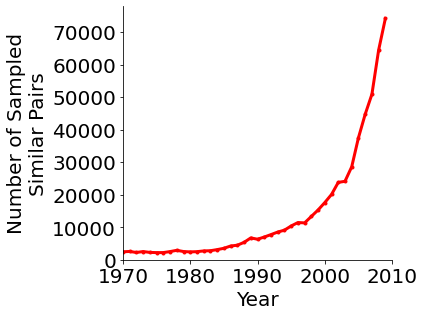

In [57]:
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

simp_mw_yr.plot(style='.-',color='red', lw=3)

plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1970, xmax=2010)
plt.xticks(np.arange(1970, 2011, 10), fontsize=20)
plt.ylabel('Number of Sampled\nSimilar Pairs', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_7.pdf")

In [58]:
simp_mw_yr = pd.DataFrame({'year':simp_mw_yr.index, 'count':simp_mw_yr.values})

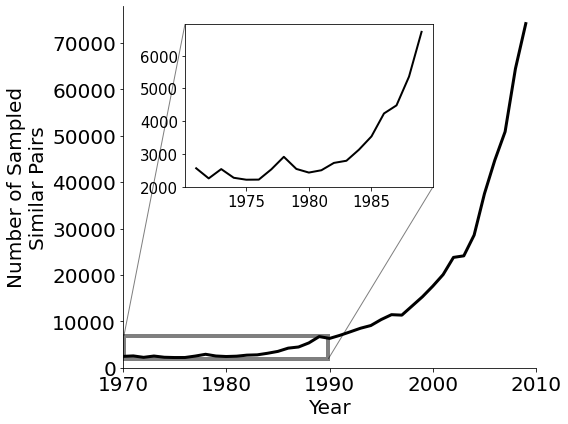

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plt.plot(simp_mw_yr['year'], simp_mw_yr['count'], color='black', lw=3)

inset_ax = ax.inset_axes([0.15, 0.5, 0.6, 0.45])
inset_ax.plot(simp_mw_yr['year'][52:71], simp_mw_yr['count'][52:71], color='black', lw=2)
inset_ax.tick_params(labelsize=15)

plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1970, xmax=2010)
plt.xticks(np.arange(1970, 2011, 10), fontsize=20)
plt.ylabel('Number of Sampled\nSimilar Pairs', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)
ax.indicate_inset_zoom(inset_ax, edgecolor="black", linewidth = 4)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/simpairs_zoomed.pdf")

## Comparing similar m-m pairs and m-w pairs

### Percentile plots of centrality difference by year

In [3]:
# man-man pairs

sim_mm = pd.read_csv("./mmpairs_similarity.csv")

# apply year restriction

mms = sim_mm[sim_mm['yeard'] <= 3]
mms = mms[mms['yeard'] >= -3].reset_index(drop=True)

# label the publication year of pairs as the publication year of a latter one

lateryear = []

for i in tqdm(range(len(mms))):
    lateryear.append(max(mms['year1'][i], mms['year2'][i]))

mms['lateryear'] = lateryear

# apply similarity threshold

p = 0.001

simp_mm = mms[mms['qval'] < p].sort_values('countd').reset_index(drop=True)
print(len(simp_mm)/len(mms))

simp_mm = simp_mm[['lateryear', 'countd']].sort_values(by=['lateryear', 'countd'])

100%|██████████| 19193545/19193545 [02:05<00:00, 152837.56it/s]


0.11612544738348231


In [61]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [62]:
# find the percentile statistics for m-w pairs

paired_mf = simp_mw.groupby('lateryear').agg([np.mean, percentile(10), percentile(20),
                                      percentile(30), percentile(40), np.median,
                                      percentile(60), percentile(70), percentile(80),
                                      percentile(90)]).reset_index()

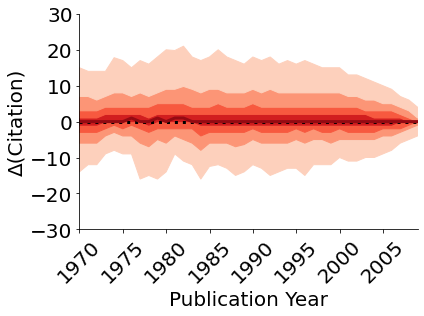

In [63]:
# m-w pair percentile plot

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

cm = sns.color_palette("Reds",10)

plt.axhline(y=0, color='black', linestyle='dotted', lw=3)
plt.plot(paired_mf.lateryear,paired_mf.countd["median"],"-",label="M-F Median", color=cm[9], lw=3)

plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_10"],
                 paired_mf.countd["percentile_20"], color=cm[1])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_20"],
                 paired_mf.countd["percentile_30"], color=cm[3])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_30"],
                 paired_mf.countd["percentile_40"], color=cm[5])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_40"],
                 paired_mf.countd["median"], color=cm[7])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["median"],
                 paired_mf.countd["percentile_60"], color=cm[7])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_60"],
                 paired_mf.countd["percentile_70"], color=cm[5])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_70"],
                 paired_mf.countd["percentile_80"], color=cm[3])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_80"],
                 paired_mf.countd["percentile_90"], color=cm[1])

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Publication Year", fontsize=20)
plt.ylabel("\u0394(Citation)", fontsize=20)

plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-30, ymax=30)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/mfpair_pp.pdf")

In [65]:
ref = simp_mw.lateryear.unique()
numlist = []

mm_centrality = pd.DataFrame(columns=['lateryear'])

for num in ref:
    numlist.append(num)
mm_centrality['lateryear'] = numlist

# take the average of 100 random m-m pair samples per year and calculate the centrality difference

for k in tqdm(range(100)):
    df1 = pd.DataFrame(columns=['lateryear', 'countd'])
    vlist = []

    for i in range(len(ref)):
        df2 = simp_mm[simp_mm['lateryear'] == ref[i]].sample(
            simp_mw.lateryear.value_counts().sort_index().iloc[i], replace=True)
        df1 = pd.concat([df1,df2])
    
    for j in range(len(df1)):
        if randint(0,1) == 0:
            vlist.append(df1.countd.iloc[j])
        else:
            vlist.append(df1.countd.iloc[j] * -1)
    
    df1['value'] = vlist
    df1 = df1.groupby("lateryear").agg([np.mean]).reset_index().drop(['lateryear'], axis=1)

    mm_centrality = pd.concat([mm_centrality, df1], axis=1)

mm_centrality.head()

100%|██████████| 100/100 [08:11<00:00,  4.91s/it]


,lateryear,"(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)",...,"(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)"
0,1903,-0.666667,0.0,-0.666667,0.0,-0.666667,0.666667,0.0,0.0,0.666667,...,0.0,0.666667,-0.666667,0.0,-0.666667,0.0,0.0,0.0,-0.666667,0.0
1,1916,0.000000,9.0,1.000000,1.0,-6.000000,-5.000000,9.0,-6.0,-1.000000,...,-6.0,-5.000000,0.000000,9.0,0.000000,-5.0,-9.0,5.0,4.000000,0.0
2,1918,-11.000000,1.0,0.000000,-11.0,1.000000,2.000000,14.0,-1.0,2.000000,...,1.0,14.000000,1.000000,-1.0,-14.000000,0.0,0.0,0.0,-1.000000,0.0
3,1921,1.000000,3.0,0.000000,2.0,-1.000000,3.000000,0.0,2.0,-2.000000,...,1.0,1.000000,-2.000000,3.0,-3.000000,0.0,-3.0,-1.0,-1.000000,-1.0
4,1923,-2.000000,0.0,-1.000000,10.0,0.000000,0.500000,7.5,-9.5,-1.000000,...,-6.0,7.000000,-8.000000,5.5,0.000000,5.0,6.0,-4.5,1.000000,-1.5


In [66]:
# record the percentiles of the average statistics of 100 m-m pairs per year

paired_mm = mm_centrality.copy()

list_1, list_2, list_3, list_4, list_5, list_6, list_7, list_8, list_9 = [], [], [], [], [], [], [], [], []

for i in range(len(paired_mm)):
    list_1.append(np.percentile(paired_mm.iloc[i,1:],10))
    list_2.append(np.percentile(paired_mm.iloc[i,1:],20))
    list_3.append(np.percentile(paired_mm.iloc[i,1:],30))
    list_4.append(np.percentile(paired_mm.iloc[i,1:],40))
    list_5.append(np.median(paired_mm.iloc[i,1:]))
    list_6.append(np.percentile(paired_mm.iloc[i,1:],60))
    list_7.append(np.percentile(paired_mm.iloc[i,1:],70))
    list_8.append(np.percentile(paired_mm.iloc[i,1:],80))
    list_9.append(np.percentile(paired_mm.iloc[i,1:],90))

paired_mm['percentile_10'] = list_1
paired_mm['percentile_20'] = list_2
paired_mm['percentile_30'] = list_3
paired_mm['percentile_40'] = list_4
paired_mm['median'] = list_5
paired_mm['percentile_60'] = list_6
paired_mm['percentile_70'] = list_7
paired_mm['percentile_80'] = list_8
paired_mm['percentile_90'] = list_9

paired_mm = paired_mm[['lateryear', 'percentile_10','percentile_20','percentile_30',
                       'percentile_40','median','percentile_60','percentile_70',
                       'percentile_80','percentile_90']]

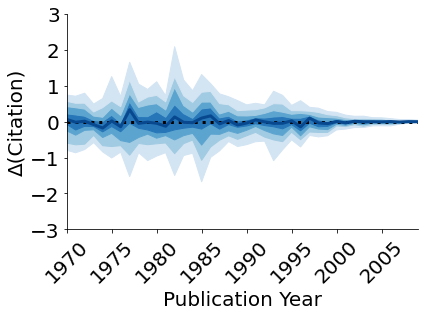

In [68]:
# m-m averaged percentile plot

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

cm2 = sns.color_palette("Blues",10)

plt.axhline(y=0, color='black', linestyle='dotted', lw=3)
plt.plot(paired_mm.lateryear,paired_mm["median"],"-",label="M-M Median", color=cm2[9], lw=3)

plt.fill_between(paired_mm.lateryear, paired_mm["percentile_10"],
                 paired_mm["percentile_20"], color=cm2[1])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_20"],
                 paired_mm["percentile_30"], color=cm2[3])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_30"],
                 paired_mm["percentile_40"], color=cm2[5])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_40"],
                 paired_mm["median"], color=cm2[7])
plt.fill_between(paired_mm.lateryear, paired_mm["median"],
                 paired_mm["percentile_60"], color=cm2[7])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_60"],
                 paired_mm["percentile_70"], color=cm2[5])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_70"],
                 paired_mm["percentile_80"], color=cm2[3])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_80"],
                 paired_mm["percentile_90"], color=cm2[1])

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Publication Year", fontsize=20)
plt.ylabel("\u0394(Citation)", fontsize=20)

plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-3, ymax=3)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/mmpair_pp.pdf")

### Centrality differences of similar m-m & m-f pairs by year

In [69]:
# mm_ms is the DataFrame for the difference plot (M-M pairs)
mm_ms = mm_centrality.copy()

# Retrieving the list of means and SDs
meanlist = mm_ms.iloc[:,1:].mean(axis=1).tolist()
sdlist = mm_ms.iloc[:,1:].std(axis=1).tolist()

# Appending to the DataFrame
mm_ms['avg'] = meanlist
mm_ms['sd'] = sdlist
mm_ms = mm_ms[['lateryear','avg','sd']]

In [70]:
# mf_ms is the DataFrame for the difference plot (M-F pairs)
mf_ms = simp_mw.groupby("lateryear").agg(['count', np.mean, np.std]).reset_index()

# Retrieve a standard error list for M-F pairs
semlist = []

for i in range(len(mf_ms)):
    semlist.append(mf_ms.countd['std'][i]/math.sqrt(mf_ms.countd['count'][i]))

mf_ms['sem'] = semlist

In [71]:
# remove sparse year data (not used in visualization regardlessly)

mm_ms = mm_ms.loc[4:].reset_index(drop=True)
mf_ms = mf_ms.loc[4:].reset_index(drop=True)

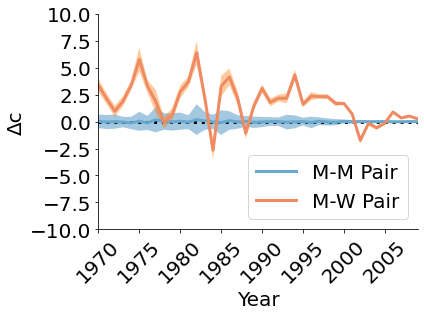

In [72]:
# Creating a year vs. centrality difference plot, separated by gender

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Equilibrium line
plt.axhline(y=0, color='black', linestyle='dotted', lw=3)

# Plotting M-M pairs
plt.plot(mm_ms.lateryear,mm_ms.avg,"-",label="M-M Pair",
         color='#67a9cf', lw=3)

# shading the SD area (M-M)
X  = np.linspace(min(mm_ms.lateryear),max(mm_ms.lateryear),mm_ms.lateryear.nunique())
plt.fill_between(X,
                 mm_ms.avg + mm_ms.sd,
                 mm_ms.avg - mm_ms.sd,
                 color='C0',alpha=.4,edgecolor="none")

# Plotting M-F pairs
plt.plot(mf_ms.lateryear,mf_ms.countd['mean'],"-",label="M-W Pair",
         color='#ef8a62', lw=3)

# shading the SE area (M-F)
plt.fill_between(X,
                 mf_ms.countd['mean'] + mf_ms['sem'],
                 mf_ms.countd['mean'] - mf_ms['sem'],
                 color='C1',alpha=.4,edgecolor="none")

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("\u0394c",fontsize=20)
plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-10, ymax=10)

plt.legend(loc='lower right', fontsize=20)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/mm_mf_cdiff.pdf")

### Standardized centrality differences of similar m-m & m-f pairs by year

In [4]:
sdz = pd.read_csv('./standardized.csv')

print(len(sdz))
sdz.head()

229814


,doi,id,gender,year,stn_cen
0,10.1103/PhysRev.140.A1133,219005,male,1965,37.563499
1,10.1103/PhysRev.139.A796,95754,male,1965,4.563926
2,10.1103/PhysRev.140.A1197,165388,male,1965,2.611288
3,10.1103/PhysRev.137.A1726,151124,male,1965,1.757914
4,10.1103/PhysRevLett.14.627,114066,male,1965,1.555418


In [5]:
print(len(sim_mf))

14490273


In [6]:
sdz_cen = sdz[['doi', 'stn_cen']]

sim_mf_sdz = sim_mf.copy().drop(['count1', 'count2', 'countd'], axis=1)

sim_mf_sdz = sim_mf_sdz.merge(sdz_cen, left_on='paper1', right_on='doi').rename(
    columns = {'stn_cen': 'scen1'}).drop(['doi'], axis=1)
sim_mf_sdz = sim_mf_sdz.merge(sdz_cen, left_on='paper2', right_on='doi').rename(
    columns = {'stn_cen': 'scen2'}).drop(['doi'], axis=1)

print(len(sim_mf_sdz))
sim_mf_sdz.head()

10675979


,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,yeard,scen1,scen2
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.77.201402,female,male,2006,2008,8,0.000071,2,-0.584015,-0.086687
1,10.1103/PhysRevB.73.045426,10.1103/PhysRevB.77.201402,female,male,2006,2008,32,0.001614,2,0.665925,-0.086687
2,10.1103/PhysRevB.69.033402,10.1103/PhysRevB.77.201402,female,male,2004,2008,105,0.016393,4,-0.116718,-0.086687
3,10.1103/PhysRevB.74.035411,10.1103/PhysRevLett.78.2445,female,male,2006,1997,13,0.000143,-9,-0.584015,-0.209051
4,10.1103/PhysRevB.77.205309,10.1103/PhysRevLett.78.2445,female,male,2008,1997,15,0.000357,-11,0.397210,-0.209051


In [7]:
scend = []

for i in tqdm(range(len(sim_mf_sdz))):
    if sim_mf_sdz['gender1'][i] == 'male':
        scend.append(sim_mf_sdz['scen1'][i] - sim_mf_sdz['scen2'][i])
    else:
        scend.append(sim_mf_sdz['scen2'][i] - sim_mf_sdz['scen1'][i])
        
sim_mf_sdz['scend'] = scend

sim_mf_sdz.head()

100%|██████████| 10675979/10675979 [04:35<00:00, 38756.54it/s]


,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,yeard,scen1,scen2,scend
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.77.201402,female,male,2006,2008,8,0.000071,2,-0.584015,-0.086687,0.497328
1,10.1103/PhysRevB.73.045426,10.1103/PhysRevB.77.201402,female,male,2006,2008,32,0.001614,2,0.665925,-0.086687,-0.752612
2,10.1103/PhysRevB.69.033402,10.1103/PhysRevB.77.201402,female,male,2004,2008,105,0.016393,4,-0.116718,-0.086687,0.030030
3,10.1103/PhysRevB.74.035411,10.1103/PhysRevLett.78.2445,female,male,2006,1997,13,0.000143,-9,-0.584015,-0.209051,0.374964
4,10.1103/PhysRevB.77.205309,10.1103/PhysRevLett.78.2445,female,male,2008,1997,15,0.000357,-11,0.397210,-0.209051,-0.606261


In [8]:
mfs = sim_mf_sdz[sim_mf_sdz['yeard'] <= 3]
mfs = mfs[mfs['yeard'] >= -3].reset_index(drop=True)

lateryear = []

for i in tqdm(range(len(mfs))):
    lateryear.append(max(mfs['year1'][i], mfs['year2'][i]))

mfs['lateryear'] = lateryear

mfs.head()

100%|██████████| 4113341/4113341 [00:27<00:00, 151517.17it/s]


,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,yeard,scen1,scen2,scend,lateryear
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.77.201402,female,male,2006,2008,8,0.000071,2,-0.584015,-0.086687,0.497328,2008
1,10.1103/PhysRevB.73.045426,10.1103/PhysRevB.77.201402,female,male,2006,2008,32,0.001614,2,0.665925,-0.086687,-0.752612,2008
2,10.1103/PhysRevB.56.15806,10.1103/PhysRevLett.78.2445,female,male,1997,1997,39,0.001362,0,-0.117783,-0.209051,-0.091268,1997
3,10.1103/PhysRevB.74.035411,10.1103/PhysRevE.70.026406,female,male,2006,2004,15,0.000178,-2,-0.584015,-0.116718,0.467297,2006
4,10.1103/PhysRevB.71.014207,10.1103/PhysRevE.70.026406,female,male,2005,2004,38,0.001277,-1,0.164141,-0.116718,-0.280858,2005


In [9]:
p = 0.001

simp = mfs[mfs['qval'] < p].sort_values('scend').reset_index(drop=True)
print(len(simp)/len(mfs))

simp_mw = simp[['lateryear', 'scend']].sort_values(by=['lateryear', 'scend'])

0.10409445752248597


In [45]:
# mf_ms is the DataFrame for the difference plot (M-F pairs)
mf_ms = simp_mw.groupby("lateryear").agg(['count', np.mean, np.std]).reset_index()

# Retrieve a standard error list for M-F pairs
semlist = []

for i in range(len(mf_ms)):
    semlist.append(mf_ms.scend['std'][i]/math.sqrt(mf_ms.scend['count'][i]))

mf_ms['sem'] = semlist

mf_ms.head()

lateryear scend                           sem
            count      mean       std          
0      1903     1 -1.208647       NaN       NaN
1      1916     1  0.523322       NaN       NaN
2      1923     2  0.347152  0.695675  0.491916
3      1924     3 -1.334300  1.215590  0.701821
4      1925     9  0.183615  1.233427  0.411142

In [11]:
# man-man pairs

sim_mm = pd.read_csv("./mmpairs_similarity.csv")

# standardization

sim_mm_sdz = sim_mm.copy().drop(['count1', 'count2', 'countd'], axis=1)

sim_mm_sdz = sim_mm_sdz.merge(sdz_cen, left_on='paper1', right_on='doi').rename(
    columns = {'stn_cen': 'scen1'}).drop(['doi'], axis=1)
sim_mm_sdz = sim_mm_sdz.merge(sdz_cen, left_on='paper2', right_on='doi').rename(
    columns = {'stn_cen': 'scen2'}).drop(['doi'], axis=1)

sim_mm_sdz['scend'] = sim_mm_sdz['scen1'] - sim_mm_sdz['scen2']

sim_mf_sdz.head()

print(len(sim_mm_sdz))
sim_mm_sdz.head()

39981541


,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,yeard,scen1,scen2,scend
0,10.1103/RevModPhys.16.1,10.1103/RevModPhys.20.585,male,male,1944,1948,2,-1.297054e-10,-4,0.394408,4.327156,-3.932748
1,10.1103/PhysRev.44.265,10.1103/RevModPhys.20.585,male,male,1933,1948,6,9.137460e-03,-15,-0.440217,4.327156,-4.767373
2,10.1103/PhysRev.73.16,10.1103/RevModPhys.20.585,male,male,1948,1948,5,1.126177e-08,0,0.072231,4.327156,-4.254925
3,10.1103/PhysRev.56.153,10.1103/RevModPhys.20.585,male,male,1939,1948,12,8.618489e-03,-9,-0.149696,4.327156,-4.476852
4,10.1103/PhysRev.49.561,10.1103/RevModPhys.20.585,male,male,1936,1948,8,1.210617e-05,-12,1.176662,4.327156,-3.150494


In [12]:
# apply year restriction

mms = sim_mm_sdz[sim_mm_sdz['yeard'] <= 3]
mms = mms[mms['yeard'] >= -3].reset_index(drop=True)

# label the publication year of pairs as the publication year of a latter one

lateryear = []

for i in tqdm(range(len(mms))):
    lateryear.append(max(mms['year1'][i], mms['year2'][i]))

mms['lateryear'] = lateryear

# apply similarity threshold

p = 0.001

simp_mm = mms[mms['qval'] < p].sort_values('scend').reset_index(drop=True)
print(len(simp_mm)/len(mms))

simp_mm = simp_mm[['lateryear', 'scend']].sort_values(by=['lateryear', 'scend'])

100%|██████████| 14640654/14640654 [01:35<00:00, 153183.17it/s]


0.11871081715338673


In [34]:
ref = simp_mw.lateryear.unique()
ref = np.delete(ref, 0)
numlist = []

mm_centrality = pd.DataFrame(columns=['lateryear'])

for num in ref:
    numlist.append(num)
mm_centrality['lateryear'] = numlist

# take the average of 100 random m-m pair samples per year and calculate the centrality difference

for k in tqdm(range(100)):
    df1 = pd.DataFrame(columns=['lateryear', 'scend'])
    vlist = []

    for i in range(len(ref)):
        df2 = simp_mm[simp_mm['lateryear'] == ref[i]].sample(
            simp_mw.lateryear.value_counts().sort_index().iloc[i], replace=True)
        df1 = pd.concat([df1,df2])
    
    for j in range(len(df1)):
        if randint(0,1) == 0:
            vlist.append(df1.scend.iloc[j])
        else:
            vlist.append(df1.scend.iloc[j] * -1)
    
#     df1['value'] = vlist
    df1['scend'] = vlist
    df1 = df1.groupby("lateryear").agg([np.mean]).reset_index().drop(['lateryear'], axis=1)

    mm_centrality = pd.concat([mm_centrality, df1], axis=1)

mm_centrality.head()

100%|██████████| 100/100 [05:45<00:00,  3.45s/it]


,lateryear,"(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)",...,"(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)","(scend, mean)"
0,1916,0.245299,0.807960,0.024021,-0.245299,-0.024021,0.245299,2.962520,0.024021,1.986288,...,0.024021,0.807960,0.024021,1.986288,3.231840,0.245299,1.986288,2.717222,0.269320,2.962520
1,1923,4.405111,-0.705580,-4.405111,1.042782,-0.406146,-1.887905,-1.887905,-0.249648,0.249648,...,-0.406146,0.249648,-0.249648,-0.983833,4.392250,1.042782,0.629302,0.000000,0.419534,-1.992788
2,1924,-0.767252,0.133935,0.972725,-0.410894,-0.221451,2.032194,-1.255308,-0.058103,1.403087,...,-0.549575,1.838801,-0.021226,-0.104884,-1.187779,2.522868,0.414462,1.088241,1.002056,0.000000
3,1925,1.285688,-0.188355,-1.909582,-1.451216,0.085617,-1.589825,0.972877,-1.075211,1.284625,...,0.299581,1.111129,-0.137546,-0.164790,0.540826,0.086585,0.397090,-0.948567,-0.065020,-1.377404
4,1926,0.033170,-0.251126,0.204408,-0.169435,-0.699086,-0.775637,0.815220,1.229520,-0.439942,...,-0.269107,-0.388272,0.510442,1.104858,0.379829,0.728566,1.179845,-0.857367,-0.000245,-0.279894


In [35]:
x = 3

simp_mm[simp_mm['lateryear'] == ref[x]].sample(
            simp_mw.lateryear.value_counts().sort_index().iloc[x], replace=True)

,lateryear,scend
888272,1925,0.000000
1270531,1925,0.256022
1188448,1925,0.182472


In [42]:
# mm_ms is the DataFrame for the difference plot (M-M pairs)
mm_ms = mm_centrality.copy()

# Retrieving the list of means and SDs
meanlist = mm_ms.iloc[:,1:].mean(axis=1).tolist()
sdlist = mm_ms.iloc[:,1:].std(axis=1).tolist()

# Appending to the DataFrame
mm_ms['avg'] = meanlist
mm_ms['sd'] = sdlist
mm_ms = mm_ms[['lateryear','avg','sd']]

In [47]:
# remove sparse year data (not used in visualization regardlessly)

mm_ms = mm_ms.loc[4:].reset_index(drop=True)
mf_ms = mf_ms.loc[5:].reset_index(drop=True)

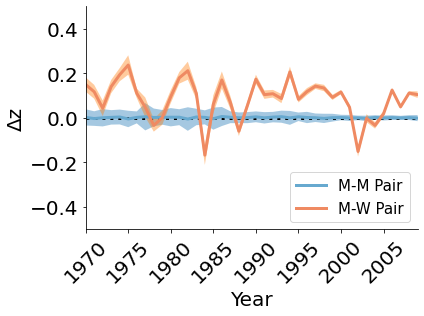

In [50]:
# Creating a year vs. centrality difference plot, separated by gender

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Equilibrium line
plt.axhline(y=0, color='black', linestyle='dotted', lw=3)

# Plotting M-M pairs
plt.plot(mm_ms.lateryear,mm_ms.avg,"-",label="M-M Pair",
         color='#67a9cf', lw=3)

# shading the SD area (M-M)
X  = np.linspace(min(mm_ms.lateryear),max(mm_ms.lateryear),mm_ms.lateryear.nunique())
plt.fill_between(X,
                 mm_ms.avg + mm_ms.sd,
                 mm_ms.avg - mm_ms.sd,
                 color='C0',alpha=.4,edgecolor="none")

# Plotting M-F pairs
plt.plot(mf_ms.lateryear,mf_ms.scend['mean'],"-",label="M-W Pair",
         color='#ef8a62', lw=3)

# shading the SE area (M-F)
plt.fill_between(X,
                 mf_ms.scend['mean'] + mf_ms['sem'],
                 mf_ms.scend['mean'] - mf_ms['sem'],
                 color='C1',alpha=.4,edgecolor="none")

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("\u0394z",fontsize=20)
plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-0.5, ymax=0.5)

plt.legend(loc='lower right', fontsize=15)

plt.tight_layout()
fig.savefig(f"./mm_mf_scdiff.pdf")

### Mann-Whitney U Test on Delta Z (m-f pairs)

In [52]:
simp_mw

,lateryear,scend
25417,1903,-1.208647
346503,1916,0.523322
146720,1923,-0.144764
377078,1923,0.839069
7574,1924,-2.519192
...,...,...
428169,2009,50.980180
428170,2009,51.160923
428171,2009,51.160923
428172,2009,51.160923


In [53]:
mwu1 = simp_mw[simp_mw['lateryear'] <= 1995]
mwu2 = simp_mw[simp_mw['lateryear'] > 1995]

mannwhitneyu(mwu1.scend, mwu2.scend)

MannwhitneyuResult(statistic=18084399616.0, pvalue=0.022743156402335984)

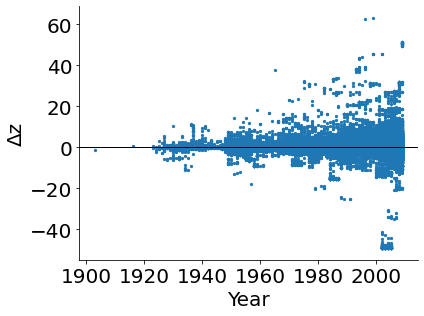

In [75]:
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("\u0394z",fontsize=20)

plt.scatter(x=simp_mw.lateryear, y=simp_mw.scend, s=5)
plt.axhline(y=0, linewidth=0.5, c='k', lw=1)

plt.tight_layout()

In [55]:
mannwhitneyu(mwu1.scend, mwu2.scend, alternative='greater')

MannwhitneyuResult(statistic=18228391503.0, pvalue=0.022743156402335984)

### Year difference vs. Centrality difference visualization by PACS

In [23]:
def sigfig(n):
    if n <= 0.001:
        return '***'
    elif n <= 0.01:
        return '**'
    elif n <= 0.05:
        return '*'
    return 'ns'

In [42]:
# Separate into 4 quadrants depending on count difference and year difference

N = 9  # subfield
sdoi = primdata[primdata[f'pacs{N}0'] == 1].doi

cy_mw = sim_mf.copy()
print(len(cy_mw))
cy_mw = cy_mw[cy_mw['qval'] < 0.001]  # apply threshold
print(len(cy_mw))
cy_mw = cy_mw[(cy_mw.paper1.isin(sdoi)) & (cy_mw.paper2.isin(sdoi))
             ].reset_index(drop=True)  # apply subfield
print(len(cy_mw))

quad1 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard > 0)]
quad2 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard < 0)]
quad3 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard < 0)]
quad4 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard > 0)]

14490273
1057275
28262


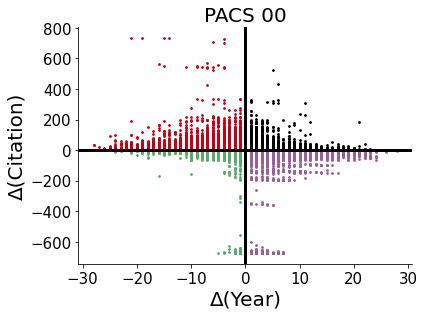

In [12]:
# build scatterplots

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Create year difference vs. count difference scatterplot
plt.title(f"PACS {N}0", fontsize=20)
plt.scatter(quad1.yeard, quad1.countd, s=3, c='#000000')
plt.scatter(quad2.yeard, quad2.countd, s=3, c='#c20114')
plt.scatter(quad3.yeard, quad3.countd, s=3, c='#59a96a')
plt.scatter(quad4.yeard, quad4.countd, s=3, c='#985f99')
plt.axhline(y=0, linewidth=0.5, c='k', lw=3)
plt.axvline(x=0, linewidth=0.5, c='k', lw=3)
plt.xlabel("\u0394(Year)", fontsize=20)
plt.ylabel("\u0394(Citation)", fontsize=20)
# plt.ylim(ymax=200)
# plt.xlim(xmin=-25, xmax=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/SI_Fig_6_PACS{N}0.pdf")

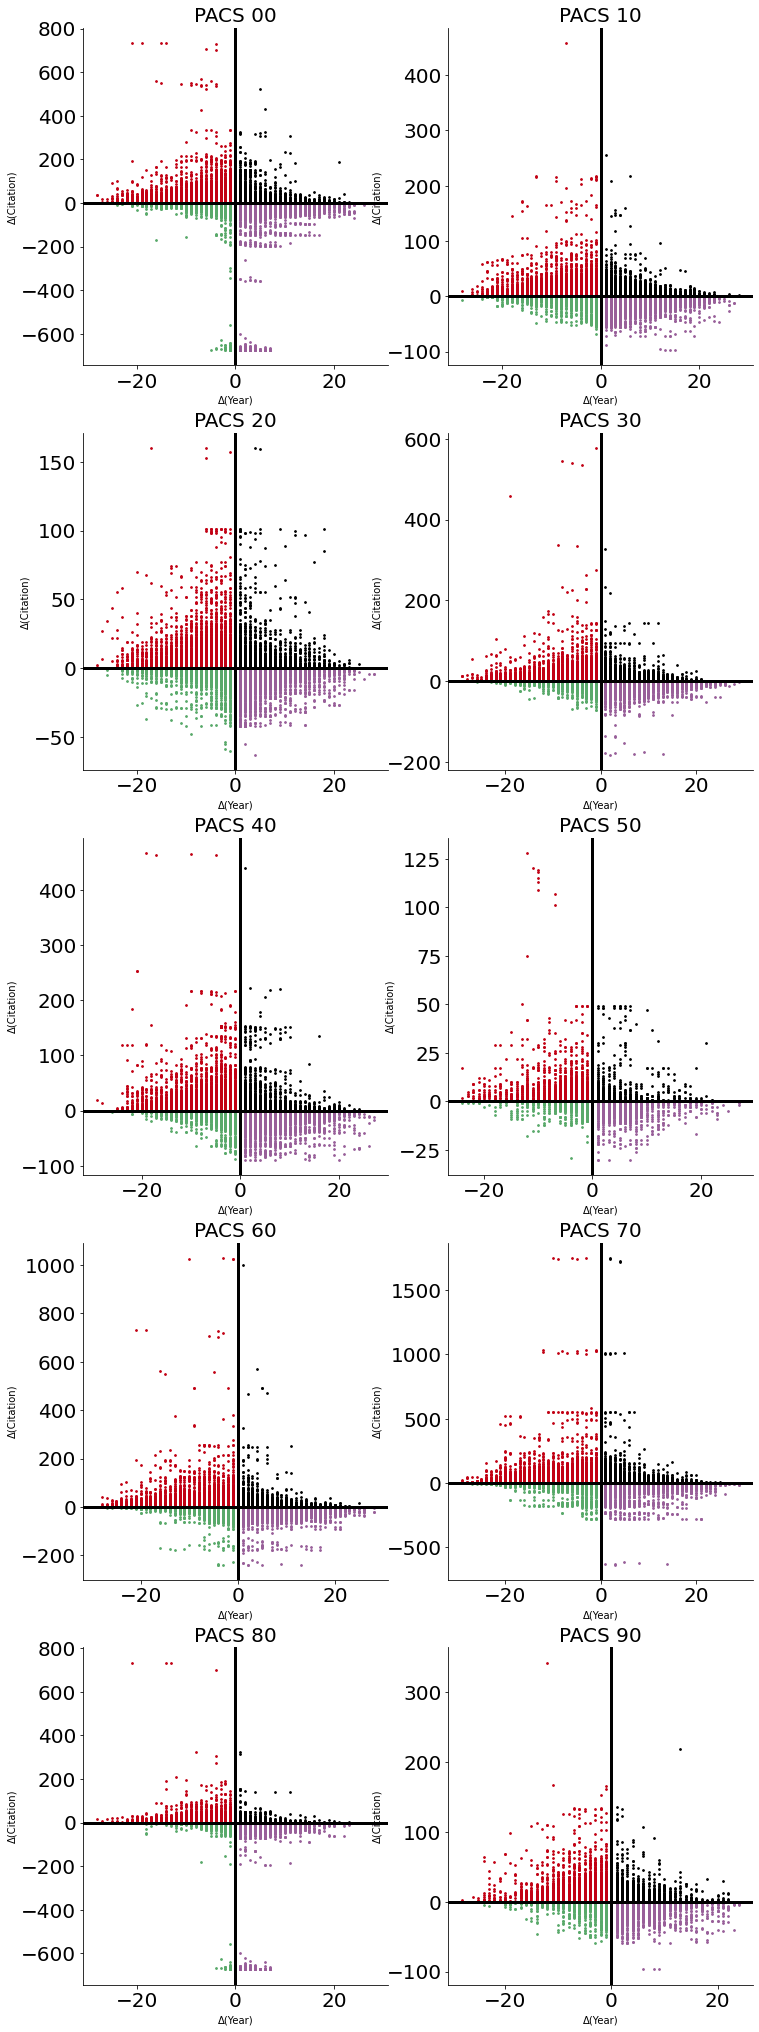

In [86]:
# ALL scatterplots

fig, axs = plt.subplots(5, 2, figsize=(12,36))

for i in range(10):
    N = i  # subfield
    sdoi = primdata[primdata[f'pacs{N}0'] == 1].doi

    cy_mw = sim_mf.copy()
    cy_mw = cy_mw[cy_mw['qval'] < 0.001]  # apply threshold
    cy_mw = cy_mw[(cy_mw.paper1.isin(sdoi)) & (cy_mw.paper2.isin(sdoi))
                 ].reset_index(drop=True)  # apply subfield

    quad1 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard > 0)]
    quad2 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard < 0)]
    quad3 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard < 0)]
    quad4 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard > 0)]
    
    (x, y) = divmod(i, 2)
    
    right_side = axs[x, y].spines["right"]
    top_side = axs[x, y].spines["top"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    
    axs[x, y].scatter(quad1.yeard, quad1.countd, s=3, c='#000000')
    axs[x, y].scatter(quad2.yeard, quad2.countd, s=3, c='#c20114')
    axs[x, y].scatter(quad3.yeard, quad3.countd, s=3, c='#59a96a')
    axs[x, y].scatter(quad4.yeard, quad4.countd, s=3, c='#985f99')
    axs[x, y].set_title(f"PACS {N}0", fontsize=20)
    axs[x, y].axhline(y=0, linewidth=0.5, c='k', lw=3)
    axs[x, y].axvline(x=0, linewidth=0.5, c='k', lw=3)
    
    axs[x, y].tick_params(axis="x", labelsize=20)
    axs[x, y].tick_params(axis="y", labelsize=20)
    
for ax in axs.flat:
    ax.set(xlabel='\u0394(Year)', ylabel='\u0394(Citation)')

# fig.savefig("/Users/robinkong/codes/PACS.pdf")

In [43]:
# Q1 vs. Q3

for i in range(1,11):
    q1 = quad1[quad1['yeard'] == i]
    q3 = quad3[quad3['yeard'] == i * -1]
    if len(q1) < 2 or len(q3) < 2:
        print('NA')
    else:
        xd = q1['countd'].mean() - abs(q3['countd']).mean()
        var = math.sqrt(statistics.stdev(q1['countd'])**2/len(q1) +
                    statistics.stdev(abs(q3['countd']))**2/len(q3))
        zscore = xd/var
        pval = norm.sf(abs(xd/var))*2
        print(format(zscore, ".4f"), format(pval, ".4f"), sigfig(pval))
        
print('-'* 30)

# Q2 vs. Q4

for i in range(1,11):
    q2 = quad2[quad2['yeard'] == i * -1]
    q4 = quad4[quad4['yeard'] == i]
    if len(q4) < 2 or len(q2) < 2:
        print('NA')
    else:
        xd = q2['countd'].mean() - abs(q4['countd']).mean()
        var = math.sqrt(statistics.stdev(q4['countd'])**2/len(q4) +
                    statistics.stdev(abs(q2['countd']))**2/len(q2))

        zscore = xd/var
        pval = norm.sf(abs(xd/var))*2
        print(format(zscore, ".4f"), format(pval, ".4f"), sigfig(pval))

5.2232 0.0000 ***
2.2317 0.0256 *
1.8725 0.0611 
1.9107 0.0560 
1.1279 0.2594 
0.5537 0.5798 
0.3924 0.6948 
1.4787 0.1392 
1.7341 0.0829 
0.9210 0.3570 
------------------------------
4.5563 0.0000 ***
3.4330 0.0006 ***
3.7576 0.0002 ***
2.8860 0.0039 **
2.4969 0.0125 *
4.2551 0.0000 ***
3.0543 0.0023 **
2.1406 0.0323 *
1.2243 0.2208 
3.0319 0.0024 **


### Year difference vs. Centrality difference visualization (all data)

In [3]:
def sigfig(n):
    if n <= 0.001:
        return '***'
    elif n <= 0.01:
        return '**'
    elif n <= 0.05:
        return '*'
    return 'ns'

In [4]:
# Separate into 4 quadrants depending on count difference and year difference

pdoi = primdata.doi

cy_mw = sim_mf.copy()
print(len(cy_mw))
cy_mw = cy_mw[cy_mw['qval'] < 0.001]  # apply threshold
print(len(cy_mw))
cy_mw = cy_mw[(cy_mw.paper1.isin(pdoi)) & (cy_mw.paper2.isin(pdoi))
             ].reset_index(drop=True)
print(len(cy_mw))

quad1 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard > 0)]
quad2 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard < 0)]
quad3 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard < 0)]
quad4 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard > 0)]

14490273
1057275
1057185


In [5]:
# Q1 vs. Q3

for i in range(1,11):
    q1 = quad1[quad1['yeard'] == i]
    q3 = quad3[quad3['yeard'] == i * -1]
    if len(q1) < 2 or len(q3) < 2:
        print('NA')
    else:
        xd = q1['countd'].mean() - abs(q3['countd']).mean()
        var = math.sqrt(statistics.stdev(q1['countd'])**2/len(q1) +
                    statistics.stdev(abs(q3['countd']))**2/len(q3))
        zscore = xd/var
        pval = norm.sf(abs(xd/var))*2
        print(format(zscore, ".4f"), format(pval, ".4f"), sigfig(pval))
        
print('-'* 30)

# Q2 vs. Q4

for i in range(1,11):
    q2 = quad2[quad2['yeard'] == i * -1]
    q4 = quad4[quad4['yeard'] == i]
    if len(q4) < 2 or len(q2) < 2:
        print('NA')
    else:
        xd = q2['countd'].mean() - abs(q4['countd']).mean()
        var = math.sqrt(statistics.stdev(q4['countd'])**2/len(q4) +
                    statistics.stdev(abs(q2['countd']))**2/len(q2))

        zscore = xd/var
        pval = norm.sf(abs(xd/var))*2
        print(format(zscore, ".4f"), format(pval, ".4f"), sigfig(pval))

7.0237 0.0000 ***
6.0599 0.0000 ***
6.2585 0.0000 ***
5.2405 0.0000 ***
4.7386 0.0000 ***
5.0340 0.0000 ***
3.8058 0.0001 ***
3.1009 0.0019 **
2.2452 0.0248 *
3.3181 0.0009 ***
------------------------------
3.8573 0.0001 ***
2.7218 0.0065 **
1.6883 0.0913 ns
2.3085 0.0210 *
3.1717 0.0015 **
3.3097 0.0009 ***
1.1321 0.2576 ns
5.3165 0.0000 ***
5.1101 0.0000 ***
4.7130 0.0000 ***


## Standardized Similarity Calculation

### Create 5-window cb dataset

In [3]:
py = paperdata[['doi', 'year']].drop_duplicates(['doi']).reset_index(drop=True)

cbpy = cb.merge(py, left_on='citing_doi', right_on='doi').drop(['doi'], axis=1).rename(
    {'year': 'citing_year'}, axis=1).reset_index(drop=True)
cbpy = cbpy.merge(py, left_on='cited_doi', right_on='doi').drop(['doi'], axis=1).rename(
    {'year': 'cited_year'}, axis=1).reset_index(drop=True)

print(len(cbpy))
cbpy.head()

3448030


,citing_doi,cited_doi,citing_year,cited_year
0,10.1103/PhysRevSeriesI.11.215,10.1103/PhysRevSeriesI.1.1,1900,1893
1,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.1.1,1903,1893
2,10.1103/RevModPhys.51.863,10.1103/PhysRevSeriesI.1.1,1979,1893
3,10.1103/PhysRevSeriesI.4.433,10.1103/PhysRevSeriesI.1.1,1897,1893
4,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.11.215,1903,1900


In [4]:
cb5 = cbpy[cbpy['citing_year']-5 <= cbpy['cited_year']][['citing_doi', 'cited_doi']].reset_index(drop=True)

print(len(cb5))
cb5.head()

1951119


,citing_doi,cited_doi
0,10.1103/PhysRevSeriesI.4.433,10.1103/PhysRevSeriesI.1.1
1,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.11.215
2,10.1103/PhysRevSeriesI.13.257,10.1103/PhysRevSeriesI.11.215
3,10.1103/PhysRevSeriesI.16.94,10.1103/PhysRevSeriesI.11.215
4,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.16.279


In [107]:
cb5.to_csv('./cb5.csv', index=False)

### count 5-window per similar pair

In [4]:
cb5 = pd.read_csv('./cb5.csv')

print(len(cb5))
cb5.head()

1951119


,citing_doi,cited_doi
0,10.1103/PhysRevSeriesI.4.433,10.1103/PhysRevSeriesI.1.1
1,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.11.215
2,10.1103/PhysRevSeriesI.13.257,10.1103/PhysRevSeriesI.11.215
3,10.1103/PhysRevSeriesI.16.94,10.1103/PhysRevSeriesI.11.215
4,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.16.279


In [5]:
sim_mf_5 = sim_mf.copy()[['paper1', 'paper2', 'gender1', 'gender2', 'year1', 'year2', 'qval']]

print(len(sim_mf_5))
sim_mf_5.head()

14486715


,paper1,paper2,gender1,gender2,year1,year2,qval
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.75.205440,female,male,2006,2007,-1.117244e-10
1,10.1103/PhysRevB.73.075112,10.1103/PhysRevB.74.045113,female,male,2006,2006,-1.117173e-10
2,10.1103/PhysRev.88.1109,10.1103/RevModPhys.24.321,male,female,1952,1952,-9.355250e-11
3,10.1103/PhysRevE.70.011103,10.1103/PhysRevE.70.056128,male,female,2004,2004,-8.545054e-11
4,10.1103/PhysRevB.76.174508,10.1103/PhysRevLett.99.087001,male,female,2007,2007,-8.545054e-11


In [6]:
cb5vc = cb5.value_counts(['citing_doi']).rename_axis('paper').reset_index(name='cen')
cb5vc

,paper,cen
0,10.1103/RevModPhys.27.77,320
1,10.1103/RevModPhys.24.321,294
2,10.1103/RevModPhys.70.1039,263
3,10.1103/RevModPhys.76.323,257
4,10.1103/RevModPhys.80.885,248
...,...,...
340475,10.1103/PhysRevB.35.2033,1
340476,10.1103/PhysRevA.13.1543,1
340477,10.1103/PhysRevD.58.093011,1
340478,10.1103/PhysRevB.35.2055,1


In [7]:
sim_mf_5 = sim_mf_5.merge(cb5vc, left_on = 'paper1', right_on = 'paper').drop(
    ['paper'], axis=1).rename({'cen': 'count1'}, axis=1).reset_index(drop=True)

sim_mf_5 = sim_mf_5.merge(cb5vc, left_on = 'paper2', right_on = 'paper').drop(
    ['paper'], axis=1).rename({'cen': 'count2'}, axis=1).reset_index(drop=True)

print(len(sim_mf_5))
sim_mf_5.head()

13617197


,paper1,paper2,gender1,gender2,year1,year2,qval,count1,count2
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.75.205440,female,male,2006,2007,-1.117244e-10,3,2
1,10.1103/PhysRevA.80.043806,10.1103/PhysRevB.75.205440,female,male,2009,2007,1.924928e-03,12,2
2,10.1103/PhysRevB.28.2485,10.1103/PhysRevB.75.205440,female,male,1983,2007,2.890173e-03,6,2
3,10.1103/PhysRevB.68.125418,10.1103/PhysRevB.75.205440,female,male,2003,2007,7.199424e-04,14,2
4,10.1103/PhysRevB.28.1076,10.1103/PhysRevB.75.205440,female,male,1983,2007,1.784440e-04,13,2


In [8]:
lateryear = []
yeard = []
countd = []

for i in tqdm(range(len(sim_mf_5))):
    if sim_mf_5.gender1[i] == 'male':
        yeard.append(sim_mf_5.year1[i]-sim_mf_5.year2[i])
        countd.append(sim_mf_5.count1[i]-sim_mf_5.count2[i])
    else:
        yeard.append(sim_mf_5.year2[i]-sim_mf_5.year1[i])
        countd.append(sim_mf_5.count2[i]-sim_mf_5.count1[i])
        
    lateryear.append(max(sim_mf_5.year1[i], sim_mf_5.year2[i]))
    
sim_mf_5['countd'] = countd
sim_mf_5['yeard'] = yeard
sim_mf_5['lateryear'] = lateryear
    
sim_mf_5.head(10)

100%|██████████| 13617197/13617197 [07:48<00:00, 29066.82it/s]


,paper1,paper2,gender1,gender2,year1,year2,qval,count1,count2,countd,yeard,lateryear
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.75.205440,female,male,2006,2007,-1.117244e-10,3,2,-1,1,2007
1,10.1103/PhysRevA.80.043806,10.1103/PhysRevB.75.205440,female,male,2009,2007,1.924928e-03,12,2,-10,-2,2009
2,10.1103/PhysRevB.28.2485,10.1103/PhysRevB.75.205440,female,male,1983,2007,2.890173e-03,6,2,-4,24,2007
3,10.1103/PhysRevB.68.125418,10.1103/PhysRevB.75.205440,female,male,2003,2007,7.199424e-04,14,2,-12,4,2007
4,10.1103/PhysRevB.28.1076,10.1103/PhysRevB.75.205440,female,male,1983,2007,1.784440e-04,13,2,-11,24,2007
5,10.1103/PhysRevB.37.1666,10.1103/PhysRevB.75.205440,female,male,1988,2007,1.325674e-03,7,2,-5,19,2007
6,10.1103/PhysRevB.58.8704,10.1103/PhysRevB.75.205440,female,male,1998,2007,1.439885e-03,3,2,-1,9,2007
7,10.1103/PhysRevB.40.10,10.1103/PhysRevB.75.205440,female,male,1989,2007,1.924928e-03,2,2,0,18,2007
8,10.1103/PhysRevA.6.492,10.1103/PhysRevB.75.205440,female,male,1972,2007,3.831418e-03,4,2,-2,35,2007
9,10.1103/PhysRevB.66.205103,10.1103/PhysRevB.75.205440,female,male,2002,2007,9.433962e-03,2,2,0,5,2007


In [9]:
sim_mf_5.to_csv('./sim_mf_5.csv', index=False)

In [3]:
# sim_mf_5 = pd.read_csv('./sim_mf_5.csv')

mfs_5 = sim_mf_5[sim_mf_5['yeard'] <= 3]
mfs_5 = mfs_5[mfs_5['yeard'] >= -3].reset_index(drop=True)

mfs_5.head()

,paper1,paper2,gender1,gender2,year1,year2,qval,count1,count2,countd,yeard,lateryear
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.75.205440,female,male,2006,2007,-1.117244e-10,3,2,-1,1,2007
1,10.1103/PhysRevA.80.043806,10.1103/PhysRevB.75.205440,female,male,2009,2007,1.924928e-03,12,2,-10,-2,2009
2,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.80.155412,female,male,2006,2009,7.072637e-05,3,4,1,3,2009
3,10.1103/PhysRevB.77.235107,10.1103/PhysRevB.80.155412,female,male,2008,2009,5.000000e-01,25,4,-21,1,2009
4,10.1103/PhysRevB.79.115317,10.1103/PhysRevB.80.155412,female,male,2009,2009,1.000000e-01,17,4,-13,0,2009


In [4]:
p = 0.001

simp_5 = mfs_5[mfs_5['qval'] < p].sort_values('countd').reset_index(drop=True)
print(len(simp_5)/len(mfs_5))

simp_mw_5 = simp_5[['lateryear', 'countd']].sort_values(by=['lateryear', 'countd'])

0.10459884305036277


In [5]:
# mf_ms is the DataFrame for the difference plot (M-F pairs)
mf_ms_5 = simp_mw_5.groupby("lateryear").agg(['count', np.mean, np.std]).reset_index()

# Retrieve a standard error list for M-F pairs
semlist = []

for i in range(len(mf_ms_5)):
    semlist.append(mf_ms_5.countd['std'][i]/math.sqrt(mf_ms_5.countd['count'][i]))

mf_ms_5['sem'] = semlist

In [10]:
sim_mm_5 = sim_mm.copy().drop(['keyval', 'count1', 'count2', 'countd'], axis=1)

sim_mm_5 = sim_mm_5.merge(cb5vc, left_on='paper1', right_on='paper').rename(
    columns = {'cen': 'count1'}).drop(['paper'], axis=1)
sim_mm_5 = sim_mm_5.merge(cb5vc, left_on='paper2', right_on='paper').rename(
    columns = {'cen': 'count2'}).drop(['paper'], axis=1)

sim_mm_5['countd'] = sim_mm_5['count1'] - sim_mm_5['count2']

print(len(sim_mm_5))
sim_mm_5.head()

49200056


,paper1,paper2,gender1,gender2,year1,year2,qval,yeard,count1,count2,countd
0,10.1103/RevModPhys.16.1,10.1103/RevModPhys.20.585,male,male,1944,1948,-1.297054e-10,-4,164,214,-50
1,10.1103/PhysRev.44.265,10.1103/RevModPhys.20.585,male,male,1933,1948,9.137460e-03,-15,19,214,-195
2,10.1103/PhysRev.58.1118.2,10.1103/RevModPhys.20.585,male,male,1940,1948,2.468901e-03,-8,5,214,-209
3,10.1103/PhysRev.73.16,10.1103/RevModPhys.20.585,male,male,1948,1948,1.126177e-08,0,12,214,-202
4,10.1103/PhysRev.56.153,10.1103/RevModPhys.20.585,male,male,1939,1948,8.618489e-03,-9,22,214,-192


In [11]:
lateryear = []

for i in tqdm(range(len(sim_mm_5))):
    lateryear.append(max(sim_mm_5['year1'][i], sim_mm_5['year2'][i]))
    
sim_mm_5['lateryear'] = lateryear

100%|██████████| 49200056/49200056 [15:30<00:00, 52894.20it/s]


In [12]:
sim_mm_5.to_csv('./sim_mm_5.csv', index=False)

In [6]:
# sim_mm_5 = pd.read_csv('./sim_mm_5.csv')

# apply year restriction

mms_5 = sim_mm_5[sim_mm_5['yeard'] <= 3]
mms_5 = mms_5[mms_5['yeard'] >= -3].reset_index(drop=True)

# apply similarity threshold

p = 0.001

simp_mm_5 = mms_5[mms_5['qval'] < p].sort_values('countd').reset_index(drop=True)
print(len(simp_mm_5)/len(mms_5))

simp_mm_5 = simp_mm_5[['lateryear', 'countd']].sort_values(by=['lateryear', 'countd'])

0.11894486004710872


In [7]:
ref = simp_mw_5.lateryear.unique()
ref = np.delete(ref, 0)
numlist = []

mm_centrality_5 = pd.DataFrame(columns=['lateryear'])

for num in ref:
    numlist.append(num)
mm_centrality_5['lateryear'] = numlist

# take the average of 100 random m-m pair samples per year and calculate the centrality difference

for k in tqdm(range(100)):
    df1 = pd.DataFrame(columns=['lateryear', 'countd'])
    vlist = []

    for i in range(len(ref)):
        df2 = simp_mm_5[simp_mm_5['lateryear'] == ref[i]].sample(
            simp_mw_5.lateryear.value_counts().sort_index().iloc[i], replace=True)
        df1 = pd.concat([df1,df2])
    
    for j in range(len(df1)):
        if randint(0,1) == 0:
            vlist.append(df1.countd.iloc[j])
        else:
            vlist.append(df1.countd.iloc[j] * -1)
    
#     df1['value'] = vlist
    df1['countd'] = vlist
    df1 = df1.groupby("lateryear").agg([np.mean]).reset_index().drop(['lateryear'], axis=1)

    mm_centrality_5 = pd.concat([mm_centrality_5, df1], axis=1)

mm_centrality_5.head()

100%|██████████| 100/100 [06:50<00:00,  4.10s/it]


,lateryear,"(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)",...,"(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)","(countd, mean)"
0,1916,0.0,-0.333333,-1.0,0.0,0.666667,0.666667,-0.666667,-0.666667,-0.333333,...,0.333333,1.0,0.0,0.666667,0.666667,1.0,-0.333333,-1.0,-0.666667,-0.333333
1,1918,0.0,-2.000000,0.0,-2.0,-2.000000,-2.000000,-1.000000,-2.000000,1.000000,...,0.000000,0.0,-1.0,0.000000,-1.000000,0.0,2.000000,-2.0,0.000000,-2.000000
2,1921,-2.0,2.000000,1.0,1.0,-1.000000,-2.000000,2.000000,1.000000,-1.000000,...,-1.000000,1.0,1.0,1.000000,1.000000,-2.0,-1.000000,1.0,-1.000000,2.000000
3,1924,-1.0,0.000000,-1.0,1.0,0.000000,-1.000000,-2.000000,1.000000,1.000000,...,1.000000,-1.0,-1.0,0.000000,0.000000,0.0,1.000000,0.0,-1.000000,1.000000
4,1925,1.0,-1.000000,-1.0,0.5,0.000000,-0.500000,-2.000000,2.000000,-1.500000,...,2.000000,0.5,1.5,0.000000,0.000000,-1.5,0.500000,1.0,-1.500000,0.000000


In [8]:
# mm_ms is the DataFrame for the difference plot (M-M pairs)
mm_ms_5 = mm_centrality_5.copy()

# Retrieving the list of means and SDs
meanlist = mm_ms_5.iloc[:,1:].mean(axis=1).tolist()
sdlist = mm_ms_5.iloc[:,1:].std(axis=1).tolist()

# Appending to the DataFrame
mm_ms_5['avg'] = meanlist
mm_ms_5['sd'] = sdlist
mm_ms_5 = mm_ms_5[['lateryear','avg','sd']]

In [10]:
# remove sparse year data (not used in visualization regardlessly)

mm_ms_5 = mm_ms_5.loc[4:].reset_index(drop=True)
mf_ms_5 = mf_ms_5.loc[5:].reset_index(drop=True)

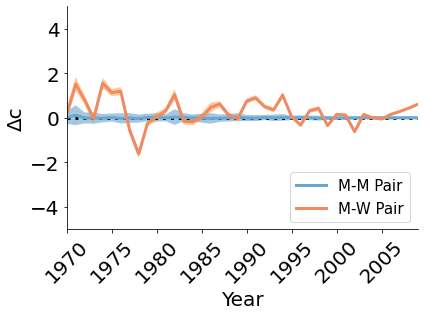

In [12]:
# Creating a year vs. centrality difference plot, separated by gender

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Equilibrium line
plt.axhline(y=0, color='black', linestyle='dotted', lw=3)

# Plotting M-M pairs
plt.plot(mm_ms_5.lateryear,mm_ms_5.avg,"-",label="M-M Pair",
         color='#67a9cf', lw=3)

# shading the SD area (M-M)
X  = np.linspace(min(mm_ms_5.lateryear),max(mm_ms_5.lateryear),mm_ms_5.lateryear.nunique())
plt.fill_between(X,
                 mm_ms_5.avg + mm_ms_5.sd,
                 mm_ms_5.avg - mm_ms_5.sd,
                 color='C0',alpha=.4,edgecolor="none")

# Plotting M-F pairs
plt.plot(mf_ms_5.lateryear,mf_ms_5.countd['mean'],"-",label="M-W Pair",
         color='#ef8a62', lw=3)

# shading the SE area (M-F)
plt.fill_between(X,
                 mf_ms_5.countd['mean'] + mf_ms_5['sem'],
                 mf_ms_5.countd['mean'] - mf_ms_5['sem'],
                 color='C1',alpha=.4,edgecolor="none")

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("\u0394c",fontsize=20)
plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-5, ymax=5)

plt.legend(loc='lower right', fontsize=15)

plt.tight_layout()
fig.savefig(f"./figs/mm_mf_cdiff_5_edit.pdf")

In [13]:
mwu1 = simp_mw_5[simp_mw_5['lateryear'] <= 1995]
mwu2 = simp_mw_5[simp_mw_5['lateryear'] > 1995]

mannwhitneyu(mwu1.countd, mwu2.countd)

MannwhitneyuResult(statistic=27857676778.0, pvalue=8.181592996235594e-08)

In [14]:
mannwhitneyu(mwu1.countd, mwu2.countd, alternative='greater')

MannwhitneyuResult(statistic=28393624742.0, pvalue=8.181592996235594e-08)

## Wilcoxon-test

In [16]:
def wlx_test(cts,zero_method="wilcox"):
    men_cts, fem_cts = cts[:,0], cts[:,1]
    T_1, pval = wilcoxon(fem_cts,men_cts,alternative="less",zero_method=zero_method)
    nonzero = len(men_cts[men_cts-fem_cts!=0])
    if zero_method == "wilcox":
        S = nonzero*((nonzero+1)/2.0)
    elif zero_method == "pratt":
        tot_smpls = len(men_cts)
        yeszero = tot_smpls - nonzero
        S = nonzero*((tot_smpls+yeszero+1)/2.0)
    else:
        raise ValueError(f"zero_method {zero_method} not implemented")
    T_2 = S-T_1
    # print (T_2/S, T_1/S)
    ## Sum of difference ranks where men have advantage (T2) minus sum of
    ## difference ranks where women have advantage (T1)
    eff_size = (T_2-T_1)/S
    return {"val":T_2-T_1, "eff_size":eff_size, "p":pval}

In [65]:
# choose dataset

# data = primdata.copy() #### IF PRIMARY
data = lastdata.copy()

cond = 9
sdoi = data[data[f'pacs{cond}0'] == 1].doi
# print("man-led: ", data.query(f'gender == "male" & pacs{cond}0 == 1').doi.nunique())
# print("woman-led: ", data.query(f'gender == "female" & pacs{cond}0 == 1').doi.nunique())

#### IF PRIMARY

# df = sim_mf[sim_mf['paper1'].isin(sdoi)]
# df = df[df['paper2'].isin(sdoi)].reset_index(drop=True)

df = sim_mf_last[sim_mf_last['paper1'].isin(sdoi)]
df = df[df['paper2'].isin(sdoi)].reset_index(drop=True)

In [68]:
# if all datasets (without subfield distinction)

# df = sim_mf.copy() #### IF PRIMARY
df = sim_mf_last.copy()

In [69]:
# non-time constraint

p = 0.001
df_vld = df[df['qval'] < p]

# print("N: ", len(df))
print("M: ", len(df_vld))
# print("M/N: ", format(len(df_vld)/len(df), ".4f"))

cts = []
for i in tqdm(range(len(df_vld))):
    if df_vld.gender1[i] == 'male':
        cts.append([df_vld.count1[i], df_vld.count2[i]])
    else:
        cts.append([df_vld.count2[i], df_vld.count1[i]])
        
cts = np.array(cts)

wlx_test(cts,zero_method="wilcox")

  0%|          | 361/931180 [00:00<04:28, 3466.32it/s]

M:  931180


100%|██████████| 931180/931180 [00:16<00:00, 58004.02it/s]


{'val': 31227697924.0, 'eff_size': 0.0991625060080718, 'p': 0.0}

In [70]:
# 3 year time constraint

N = 3

df = df[df['yeard'] >= -N]
df = df[df['yeard'] <= N].reset_index(drop=True)

p = 0.001
df_vld = df[df['qval'] < p]

# print("N: ", len(df))
print("M: ", len(df_vld))
# print("M/N: ", format(len(df_vld)/len(df), ".4f"))

cts = []
for i in tqdm(range(len(df_vld))):
    if df_vld.gender1[i] == 'male':
        cts.append([df_vld.count1[i], df_vld.count2[i]])
    else:
        cts.append([df_vld.count2[i], df_vld.count1[i]])
        
cts = np.array(cts)

wlx_test(cts,zero_method="wilcox")

  2%|▏         | 9994/505035 [00:00<00:09, 50938.32it/s]

M:  505035


100%|██████████| 505035/505035 [00:08<00:00, 56717.75it/s]


{'val': 8081723481.0, 'eff_size': 0.0911854265666251, 'p': 0.0}